In [1]:
# pip install --upgrade category_encoders

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from category_encoders import TargetEncoder

In [3]:
df = pd.read_pickle('2ndDataFrame.pkl')

In [5]:
df.head()

,trip_creation_time,route_type,source_center,destination_center,od_start_time,od_end_time,Trip_duration(mins),is_cutoff,cutoff_factor,cutoff_timestamp,...,segment_osrm_distance,segment_factor,Actual_Average_Speed,Total_trip_distance,Actual_trip_time,Osrm_Average_Speed,Total_osrm_trip_distance,Total_osrm_trip_duration,No_of_stops,Trip_total_duration(mins)
0,2018-09-20 02:35:36,0,IND388121AAA,IND388620AAB,2018-09-20 03:21:32,2018-09-20 04:47:45,86.0,True,9,2018-09-20 04:27:55,...,11.9653,1.272727,0.488128,82.981842,170.0,1.20732,107.4515,89.0,10.0,195.0
1,2018-09-20 02:35:36,0,IND388121AAA,IND388620AAB,2018-09-20 03:21:32,2018-09-20 04:47:45,86.0,True,18,2018-09-20 04:17:55,...,9.7590,1.111111,0.488128,82.981842,170.0,1.20732,107.4515,89.0,10.0,195.0
2,2018-09-20 02:35:36,0,IND388121AAA,IND388620AAB,2018-09-20 03:21:32,2018-09-20 04:47:45,86.0,True,27,2018-09-20 04:01:19,...,10.8152,2.285714,0.488128,82.981842,170.0,1.20732,107.4515,89.0,10.0,195.0
3,2018-09-20 02:35:36,0,IND388121AAA,IND388620AAB,2018-09-20 03:21:32,2018-09-20 04:47:45,86.0,True,36,2018-09-20 03:39:57,...,13.0224,1.750000,0.488128,82.981842,170.0,1.20732,107.4515,89.0,10.0,195.0
4,2018-09-20 02:35:36,0,IND388121AAA,IND388620AAB,2018-09-20 03:21:32,2018-09-20 04:47:45,86.0,False,39,2018-09-20 03:33:55,...,3.9153,1.200000,0.488128,82.981842,170.0,1.20732,107.4515,89.0,10.0,195.0


In [7]:
# Checking Categorical Features.
cat_fe = [ features for features in df.columns if df[features].dtype == 'O']
df[cat_fe].head(10)

,source_center,destination_center
0,IND388121AAA,IND388620AAB
1,IND388121AAA,IND388620AAB
2,IND388121AAA,IND388620AAB
3,IND388121AAA,IND388620AAB
4,IND388121AAA,IND388620AAB
5,IND388620AAB,IND388320AAA
6,IND388620AAB,IND388320AAA
7,IND388620AAB,IND388320AAA
8,IND388620AAB,IND388320AAA
9,IND388620AAB,IND388320AAA


In [9]:
# Checking sum of the null
df.isna().sum()

# As we can see that no null values are there in the ds.

trip_creation_time                           0
route_type                                   0
source_center                                0
destination_center                           0
od_start_time                                0
od_end_time                                  0
Trip_duration(mins)                          0
is_cutoff                                    0
cutoff_factor                                0
cutoff_timestamp                             0
actual_distance_to_destination_cumulative    0
actual_time_cumulative                       0
osrm_time_cumulative                         0
osrm_distance_cumulative                     0
factor                                       0
segment_actual_time                          0
segment_osrm_time                            0
segment_osrm_distance                        0
segment_factor                               0
Actual_Average_Speed                         0
Total_trip_distance                          0
Actual_trip_t

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138454 entries, 0 to 144315
Data columns (total 27 columns):
 #   Column                                     Non-Null Count   Dtype         
---  ------                                     --------------   -----         
 0   trip_creation_time                         138454 non-null  datetime64[ns]
 1   route_type                                 138454 non-null  int32         
 2   source_center                              138454 non-null  object        
 3   destination_center                         138454 non-null  object        
 4   od_start_time                              138454 non-null  datetime64[ns]
 5   od_end_time                                138454 non-null  datetime64[ns]
 6   Trip_duration(mins)                        138454 non-null  float64       
 7   is_cutoff                                  138454 non-null  bool          
 8   cutoff_factor                              138454 non-null  int64         
 9   cutoff_ti

## Handling Datetime features

In [14]:
datetime_cols= ['od_end_time','od_start_time','trip_creation_time','cutoff_timestamp']
for col in datetime_cols:
    df[f'{col}_hour'] = df[col].dt.hour
    df[f'{col}_dayofweek'] = df[col].dt.dayofweek
    df[f'{col}_is_weekend'] = (df[col].dt.dayofweek >= 5).astype(int)
    df[f'{col}_month'] = df[col].dt.month
    df[f'{col}_day'] = df[col].dt.day


# Dropping the original Datetime features from the dataset
df.drop(columns = ['od_end_time','od_start_time','trip_creation_time','cutoff_timestamp'], inplace = True)

In [16]:
# Below is the list of newly added columns after handling the datetime features
['od_end_time_hour', 'od_end_time_dayofweek', 'od_end_time_is_weekend',
       'od_end_time_month', 'od_end_time_day', 'od_start_time_hour',
       'od_start_time_dayofweek', 'od_start_time_is_weekend',
       'od_start_time_month', 'od_start_time_day', 'trip_creation_time_hour',
       'trip_creation_time_dayofweek', 'trip_creation_time_is_weekend',
       'trip_creation_time_month', 'trip_creation_time_day',
       'cutoff_timestamp_hour', 'cutoff_timestamp_dayofweek',
       'cutoff_timestamp_is_weekend', 'cutoff_timestamp_month',
       'cutoff_timestamp_day']

['od_end_time_hour',
 'od_end_time_dayofweek',
 'od_end_time_is_weekend',
 'od_end_time_month',
 'od_end_time_day',
 'od_start_time_hour',
 'od_start_time_dayofweek',
 'od_start_time_is_weekend',
 'od_start_time_month',
 'od_start_time_day',
 'trip_creation_time_hour',
 'trip_creation_time_dayofweek',
 'trip_creation_time_is_weekend',
 'trip_creation_time_month',
 'trip_creation_time_day',
 'cutoff_timestamp_hour',
 'cutoff_timestamp_dayofweek',
 'cutoff_timestamp_is_weekend',
 'cutoff_timestamp_month',
 'cutoff_timestamp_day']

In [18]:
df.head()

,route_type,source_center,destination_center,Trip_duration(mins),is_cutoff,cutoff_factor,actual_distance_to_destination_cumulative,actual_time_cumulative,osrm_time_cumulative,osrm_distance_cumulative,...,trip_creation_time_hour,trip_creation_time_dayofweek,trip_creation_time_is_weekend,trip_creation_time_month,trip_creation_time_day,cutoff_timestamp_hour,cutoff_timestamp_dayofweek,cutoff_timestamp_is_weekend,cutoff_timestamp_month,cutoff_timestamp_day
0,0,IND388121AAA,IND388620AAB,86.0,True,9,10.435660,14.0,11.0,11.9653,...,2,3,0,9,20,4,3,0,9,20
1,0,IND388121AAA,IND388620AAB,86.0,True,18,18.936842,24.0,20.0,21.7243,...,2,3,0,9,20,4,3,0,9,20
2,0,IND388121AAA,IND388620AAB,86.0,True,27,27.637279,40.0,28.0,32.5395,...,2,3,0,9,20,4,3,0,9,20
3,0,IND388121AAA,IND388620AAB,86.0,True,36,36.118028,62.0,40.0,45.5620,...,2,3,0,9,20,3,3,0,9,20
4,0,IND388121AAA,IND388620AAB,86.0,False,39,39.386040,68.0,44.0,54.2181,...,2,3,0,9,20,3,3,0,9,20


# Feature Encoding (handling Categorical Features)
* Target Encoding replaces a categorical value with the mean of the target variable for that category.

* We are using K-Fold + Target Encoding means so as to prevent data leakage.

* we split training data into K folds.

* For each fold:

* *Use other K−1 folds to calculate category means.*

* *Apply these means to the current fold.*

* *Test set is encoded using means from the entire training set (no leakage)*

In [21]:
# Sample split
X = df.drop(columns=['Actual_trip_time'])
y = df['Actual_trip_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Columns to encode
categorical_cols = ['source_center', 'destination_center']

# Initialize encoded DataFrame
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# K-Fold Setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# For each categorical column
for col in categorical_cols:
    encoded_col = pd.Series(index=X_train.index, dtype=np.float64)

    # Cross-validation encoding for training set
    for train_idx, val_idx in kf.split(X_train):
        encoder = TargetEncoder(cols=[col])
        encoder.fit(X_train.iloc[train_idx][col], y_train.iloc[train_idx])

        # Transform only the validation fold
        encoded_vals = encoder.transform(X_train.iloc[val_idx][[col]])
        encoded_col.iloc[val_idx] = encoded_vals[col].values

    # Store the final encoded column
    X_train_encoded[col + '_te'] = encoded_col

    # Final encoder trained on full training data
    encoder_final = TargetEncoder(cols=[col])
    encoder_final.fit(X_train[col], y_train)

    # Apply to test set
    X_test_encoded[col + '_te'] = encoder_final.transform(X_test[[col]])[col]

# Drop original categorical columns:
X_train_encoded.drop(columns=categorical_cols, inplace=True)
X_test_encoded.drop(columns=categorical_cols, inplace=True)




In [23]:
X_train_encoded.head()

,route_type,Trip_duration(mins),is_cutoff,cutoff_factor,actual_distance_to_destination_cumulative,actual_time_cumulative,osrm_time_cumulative,osrm_distance_cumulative,factor,segment_actual_time,...,trip_creation_time_is_weekend,trip_creation_time_month,trip_creation_time_day,cutoff_timestamp_hour,cutoff_timestamp_dayofweek,cutoff_timestamp_is_weekend,cutoff_timestamp_month,cutoff_timestamp_day,source_center_te,destination_center_te
135075,1,3314.0,True,484,485.210564,767.0,431.0,553.43700,1.779582,70.0,...,0,9,21,12,6,1,9,23,1985.551640,2294.293922
48411,0,43.0,True,9,9.748024,23.0,16.0,12.68050,1.437500,23.0,...,0,10,1,0,0,0,10,1,138.513299,670.013734
71197,1,435.0,True,88,88.923352,114.0,69.0,96.59380,1.652174,32.0,...,1,9,15,21,5,1,9,15,2240.220721,627.026719
129903,1,2562.0,True,638,638.012150,1213.5,607.0,820.82195,2.193959,70.0,...,0,9,21,18,5,1,9,22,1982.688314,2485.501542
129682,0,149.0,True,27,28.331860,57.0,27.0,38.28170,2.111111,17.0,...,0,9,12,23,2,0,9,12,239.503310,298.772433


In [25]:
X_train_encoded.shape

(110763, 42)

In [27]:
X_test_encoded.head()

,route_type,Trip_duration(mins),is_cutoff,cutoff_factor,actual_distance_to_destination_cumulative,actual_time_cumulative,osrm_time_cumulative,osrm_distance_cumulative,factor,segment_actual_time,...,trip_creation_time_is_weekend,trip_creation_time_month,trip_creation_time_day,cutoff_timestamp_hour,cutoff_timestamp_dayofweek,cutoff_timestamp_is_weekend,cutoff_timestamp_month,cutoff_timestamp_day,source_center_te,destination_center_te
18349,0,122.0,True,36,36.954367,54.0,27.0,38.7763,2.000000,11.0,...,0,9,19,6,2,0,9,19,361.279556,361.279556
53820,1,854.0,True,264,264.579380,413.0,240.0,316.7952,1.720833,26.0,...,0,10,1,16,2,0,10,3,2515.536418,2285.068577
7120,1,54.0,False,28,28.248926,45.0,20.0,29.7291,2.250000,17.0,...,0,9,17,4,1,0,9,18,742.223320,770.619030
56892,1,3251.0,True,638,638.126944,978.0,571.0,797.4583,1.712785,40.0,...,0,9,21,20,5,1,9,22,1986.004081,1788.089806
124410,1,1369.0,True,484,484.533407,787.0,446.0,590.1582,1.764574,55.0,...,0,9,18,13,2,0,9,19,1008.005620,2221.187436


In [29]:
X_test_encoded.shape

(27691, 42)

In [31]:
X_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27691 entries, 18349 to 69526
Data columns (total 42 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   route_type                                 27691 non-null  int32  
 1   Trip_duration(mins)                        27691 non-null  float64
 2   is_cutoff                                  27691 non-null  bool   
 3   cutoff_factor                              27691 non-null  int64  
 4   actual_distance_to_destination_cumulative  27691 non-null  float64
 5   actual_time_cumulative                     27691 non-null  float64
 6   osrm_time_cumulative                       27691 non-null  float64
 7   osrm_distance_cumulative                   27691 non-null  float64
 8   factor                                     27691 non-null  float64
 9   segment_actual_time                        27691 non-null  float64
 10  segment_osrm_time      

In [33]:
y_train.head()

135075    3115.0
48411       56.0
71197      637.0
129903    2298.0
129682     338.0
Name: Actual_trip_time, dtype: float64

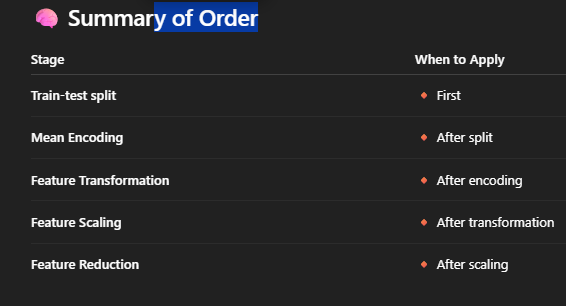

# Feature Selection:
* Feature Selection step-by-step, after train-test split, using three approaches: Correlation, Lasso, and Random Forest Feature Importance and considering the results of all three approaches

1. Correlation

In [39]:

X_train_numeric = X_train_encoded

# Combine X_train and y_train
train_df = X_train_numeric.copy()
train_df['Actual_trip_time'] = y_train

# Compute correlation matrix
corr_matrix = train_df.corr()

# Correlation of all features with the target
target_corr = corr_matrix['Actual_trip_time'].sort_values(key=abs, ascending=False)
print("Correlation with target:\n", target_corr)

Correlation with target:
 Actual_trip_time                             1.000000
Trip_total_duration(mins)                    0.984663
Total_osrm_trip_distance                     0.983907
Total_osrm_trip_duration                     0.982845
Total_trip_distance                          0.981492
No_of_stops                                  0.972450
Trip_duration(mins)                          0.894700
osrm_time_cumulative                         0.750403
osrm_distance_cumulative                     0.750305
actual_distance_to_destination_cumulative    0.750303
actual_time_cumulative                       0.746641
destination_center_te                        0.720929
source_center_te                             0.713037
cutoff_factor                                0.709904
route_type                                   0.543838
Osrm_Average_Speed                           0.537935
segment_osrm_distance                        0.460479
segment_osrm_time                            0.334213
Ac

2. Lasso

In [42]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_numeric)

# Apply LassoCV
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y_train)

# Get feature importance
lasso_importance = pd.Series(lasso.coef_, index=X_train_numeric.columns)
selected_lasso = lasso_importance[lasso_importance != 0].sort_values()

print("Selected features from Lasso:\n", selected_lasso)


Selected features from Lasso:
 Actual_Average_Speed                         -87.443932
osrm_time_cumulative                         -53.060299
cutoff_factor                                 -9.867649
trip_creation_time_hour                       -5.952982
cutoff_timestamp_month                        -4.903485
segment_actual_time                           -4.491112
trip_creation_time_is_weekend                 -3.925489
osrm_distance_cumulative                      -3.623150
actual_distance_to_destination_cumulative     -3.214887
factor                                        -2.993402
od_end_time_dayofweek                         -2.006105
trip_creation_time_day                        -0.789835
od_start_time_is_weekend                      -0.706543
od_end_time_hour                              -0.405302
od_end_time_month                             -0.091336
is_cutoff                                      0.450803
cutoff_timestamp_dayofweek                     1.184785
segment_osrm_dist

3. Random Forest Feature Importance

In [44]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_numeric, y_train)

importances = pd.Series(rf.feature_importances_, index=X_train_numeric.columns)
importances = importances.sort_values(ascending=False)

print("Top Features by Random Forest:\n", importances.head(10))

Top Features by Random Forest:
 Total_trip_distance          0.734566
Trip_total_duration(mins)    0.117134
Total_osrm_trip_distance     0.101213
Total_osrm_trip_duration     0.032478
Actual_Average_Speed         0.010399
Trip_duration(mins)          0.002441
Osrm_Average_Speed           0.001152
No_of_stops                  0.000162
trip_creation_time_hour      0.000128
trip_creation_time_day       0.000063
dtype: float64


In [45]:
# The following are the key features, considering all three methods used in model selection.

important_features = ['Trip_total_duration(mins)',
 'No_of_stops',
 'Total_osrm_trip_distance',
 'Total_osrm_trip_duration',
 'Osrm_Average_Speed',
 'route_type',
 'Trip_duration(mins)',
 'Total_trip_distance',
 'actual_time_cumulative',
 'Actual_Average_Speed',
 'source_center_te',
 'destination_center_te',
 'osrm_time_cumulative',
 'cutoff_factor',
 'trip_creation_time_hour',
 'cutoff_timestamp_month',
 'actual_distance_to_destination_cumulative',
 'od_start_time_hour',
 'od_end_time_is_weekend']

len(important_features)

19

In [48]:
X_train_final = X_train_encoded[important_features].copy()
X_test_final = X_test_encoded[important_features].copy()

In [50]:
X_train_final.head()


,Trip_total_duration(mins),No_of_stops,Total_osrm_trip_distance,Total_osrm_trip_duration,Osrm_Average_Speed,route_type,Trip_duration(mins),Total_trip_distance,actual_time_cumulative,Actual_Average_Speed,source_center_te,destination_center_te,osrm_time_cumulative,cutoff_factor,trip_creation_time_hour,cutoff_timestamp_month,actual_distance_to_destination_cumulative,od_start_time_hour,od_end_time_is_weekend
135075,3314.0,77.0,2075.6831,1535.0,1.352237,1,3314.0,1689.258044,767.0,0.542298,1985.551640,2294.293922,431.0,484,18,9,485.210564,18,0
48411,123.0,4.0,26.4820,30.0,0.882733,0,43.0,20.700735,23.0,0.369656,138.513299,670.013734,16.0,9,0,10,9.748024,0,0
71197,870.0,25.0,594.4144,447.0,1.329786,1,435.0,491.717318,114.0,0.771927,2240.220721,627.026719,69.0,88,16,9,88.923352,16,1
129903,2562.0,58.0,1640.5117,1168.0,1.404548,1,2562.0,1269.621624,1213.5,0.552490,1982.688314,2485.501542,607.0,638,23,9,638.012150,23,1
129682,483.0,17.0,225.9497,177.0,1.276552,0,149.0,133.453572,57.0,0.394833,239.503310,298.772433,27.0,27,22,9,28.331860,22,0


In [51]:
X_train_final.shape

(110763, 19)

In [52]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110763 entries, 135075 to 127112
Data columns (total 19 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Trip_total_duration(mins)                  110763 non-null  float64
 1   No_of_stops                                110763 non-null  float64
 2   Total_osrm_trip_distance                   110763 non-null  float64
 3   Total_osrm_trip_duration                   110763 non-null  float64
 4   Osrm_Average_Speed                         110763 non-null  float64
 5   route_type                                 110763 non-null  int32  
 6   Trip_duration(mins)                        110763 non-null  float64
 7   Total_trip_distance                        110763 non-null  float64
 8   actual_time_cumulative                     110763 non-null  float64
 9   Actual_Average_Speed                       110763 non-null  float64
 10  source_c

In [56]:
X_train_final.columns

Index(['Trip_total_duration(mins)', 'No_of_stops', 'Total_osrm_trip_distance',
       'Total_osrm_trip_duration', 'Osrm_Average_Speed', 'route_type',
       'Trip_duration(mins)', 'Total_trip_distance', 'actual_time_cumulative',
       'Actual_Average_Speed', 'source_center_te', 'destination_center_te',
       'osrm_time_cumulative', 'cutoff_factor', 'trip_creation_time_hour',
       'cutoff_timestamp_month', 'actual_distance_to_destination_cumulative',
       'od_start_time_hour', 'od_end_time_is_weekend'],
      dtype='object')

In [58]:
X_test_final.head()

,Trip_total_duration(mins),No_of_stops,Total_osrm_trip_distance,Total_osrm_trip_duration,Osrm_Average_Speed,route_type,Trip_duration(mins),Total_trip_distance,actual_time_cumulative,Actual_Average_Speed,source_center_te,destination_center_te,osrm_time_cumulative,cutoff_factor,trip_creation_time_hour,cutoff_timestamp_month,actual_distance_to_destination_cumulative,od_start_time_hour,od_end_time_is_weekend
18349,512.0,22.0,212.1498,153.0,1.386600,0,122.0,175.909883,54.0,0.505488,361.279556,361.279556,27.0,36,4,9,36.954367,5,0
53820,3396.0,72.0,1840.3102,1369.0,1.344273,1,854.0,1568.328377,413.0,0.561119,2515.536418,2285.068577,240.0,264,16,10,264.579380,11,0
7120,763.0,10.0,213.8671,155.0,1.379788,1,54.0,182.821420,45.0,0.419315,742.223320,770.619030,20.0,28,21,9,28.248926,4,0
56892,3251.0,79.0,2190.2958,1610.0,1.360432,1,3251.0,1721.004517,978.0,0.565190,1986.004081,1788.089806,571.0,638,6,9,638.126944,6,1
124410,1693.0,40.0,1043.4467,781.0,1.336039,1,1369.0,866.038160,787.0,0.590749,1008.005620,2221.187436,446.0,484,23,9,484.533407,4,0


In [60]:
X_test_final.shape

(27691, 19)

In [62]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27691 entries, 18349 to 69526
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Trip_total_duration(mins)                  27691 non-null  float64
 1   No_of_stops                                27691 non-null  float64
 2   Total_osrm_trip_distance                   27691 non-null  float64
 3   Total_osrm_trip_duration                   27691 non-null  float64
 4   Osrm_Average_Speed                         27691 non-null  float64
 5   route_type                                 27691 non-null  int32  
 6   Trip_duration(mins)                        27691 non-null  float64
 7   Total_trip_distance                        27691 non-null  float64
 8   actual_time_cumulative                     27691 non-null  float64
 9   Actual_Average_Speed                       27691 non-null  float64
 10  source_center_te       

In [64]:
X_test_final.columns

Index(['Trip_total_duration(mins)', 'No_of_stops', 'Total_osrm_trip_distance',
       'Total_osrm_trip_duration', 'Osrm_Average_Speed', 'route_type',
       'Trip_duration(mins)', 'Total_trip_distance', 'actual_time_cumulative',
       'Actual_Average_Speed', 'source_center_te', 'destination_center_te',
       'osrm_time_cumulative', 'cutoff_factor', 'trip_creation_time_hour',
       'cutoff_timestamp_month', 'actual_distance_to_destination_cumulative',
       'od_start_time_hour', 'od_end_time_is_weekend'],
      dtype='object')

## Feature Transformation

In [67]:
from scipy.stats import skew

Trip_total_duration(mins)
Skewness of train data =  0.8644581452107283
Skewness of test data =  0.8760764202930835


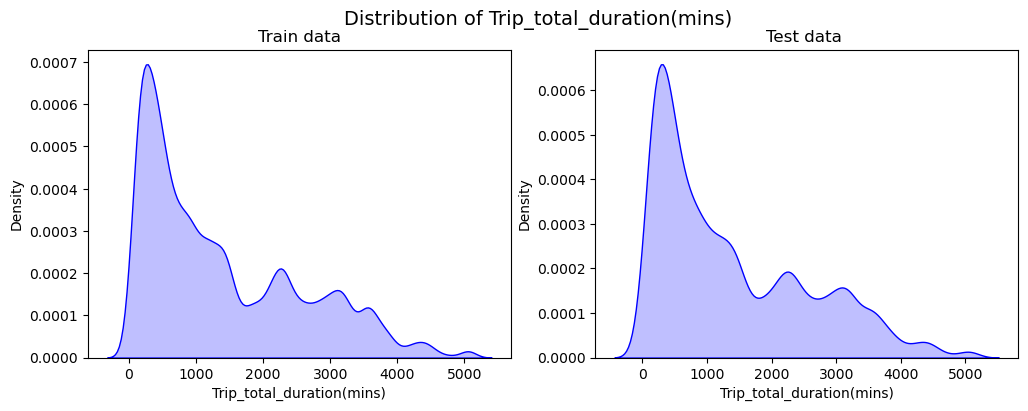

No_of_stops
Skewness of train data =  0.8907053793189315
Skewness of test data =  0.896650659642357


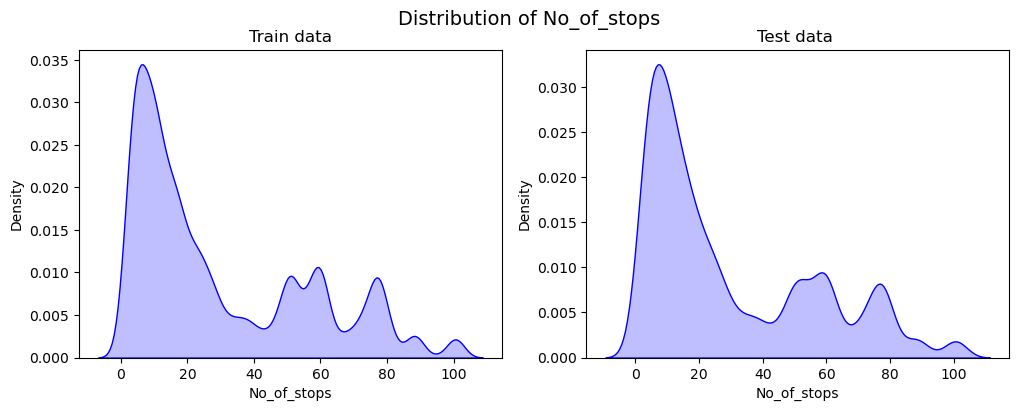

Total_osrm_trip_distance
Skewness of train data =  0.9162922428011666
Skewness of test data =  0.9204688406776365


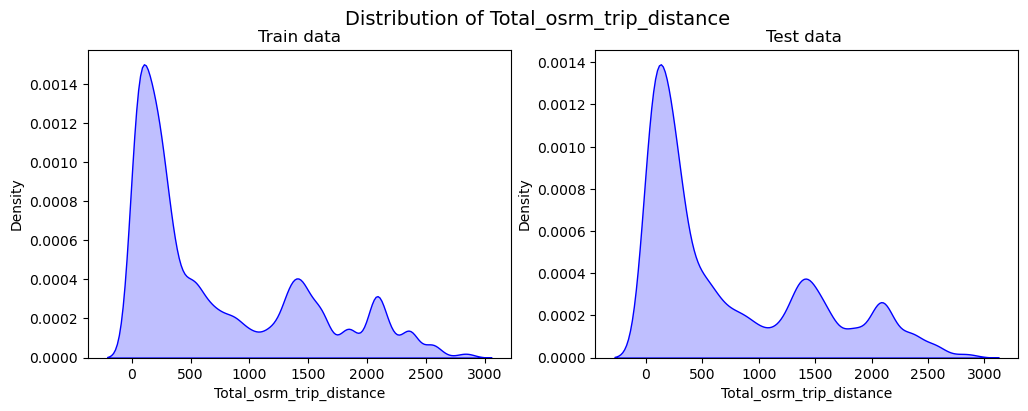

Total_osrm_trip_duration
Skewness of train data =  0.916548512200559
Skewness of test data =  0.9202765790763048


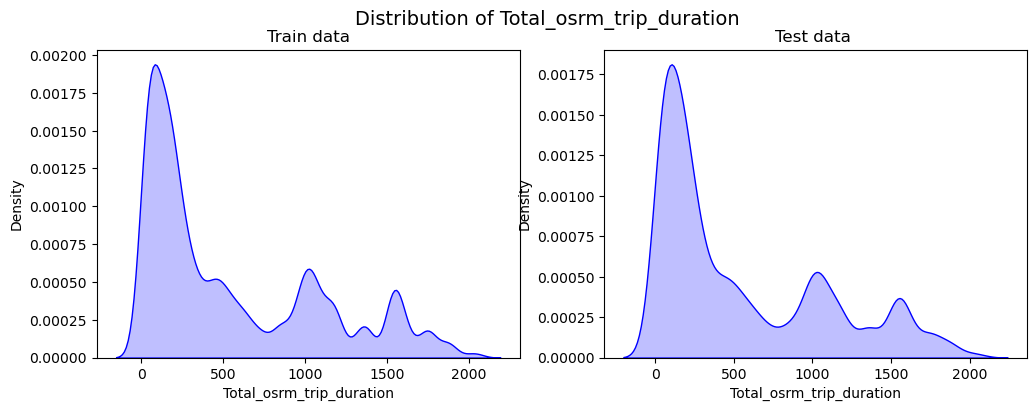

Osrm_Average_Speed
Skewness of train data =  -1.0670036461904004
Skewness of test data =  -1.0601826088043849


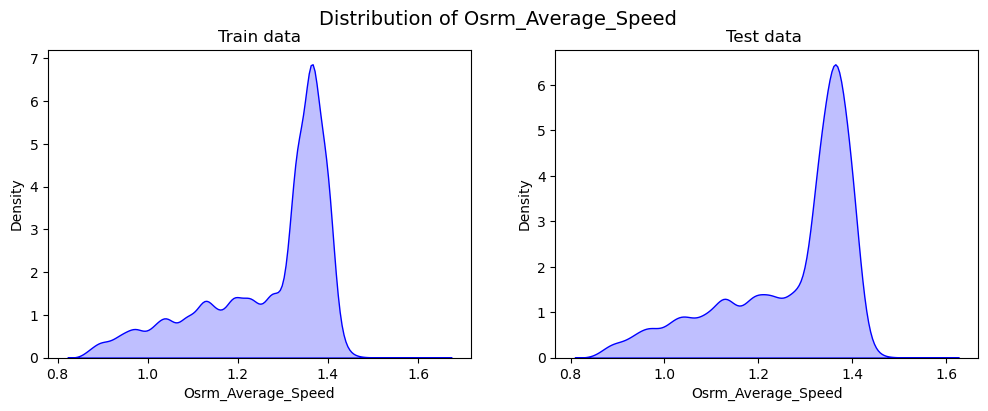

route_type
Skewness of train data =  -0.924497372089072
Skewness of test data =  -0.9037747118405782


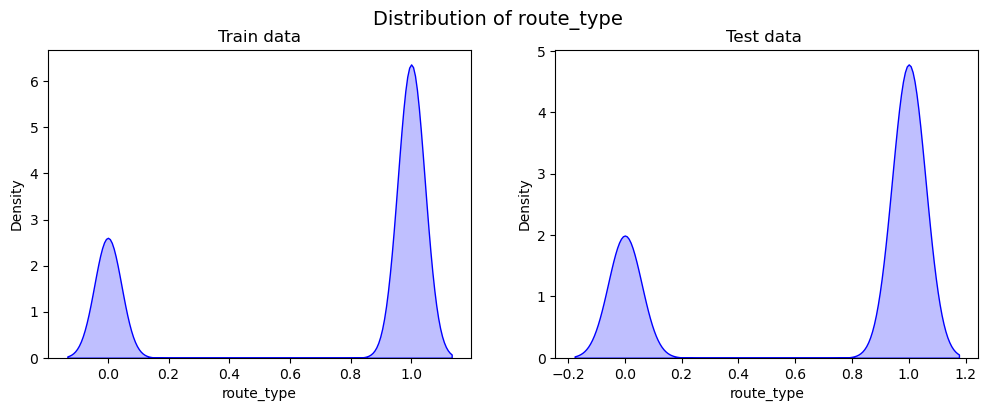

Trip_duration(mins)
Skewness of train data =  1.0496385373709707
Skewness of test data =  1.0572101701436374


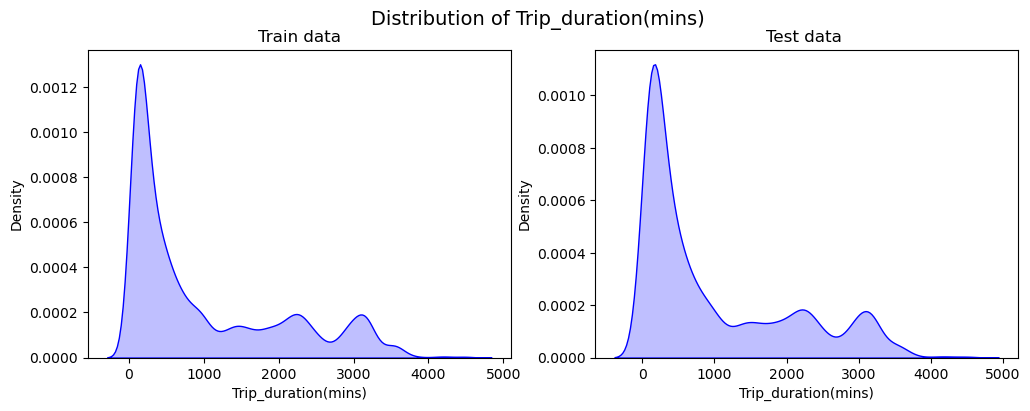

Total_trip_distance
Skewness of train data =  0.8903134704705007
Skewness of test data =  0.8932025976001469


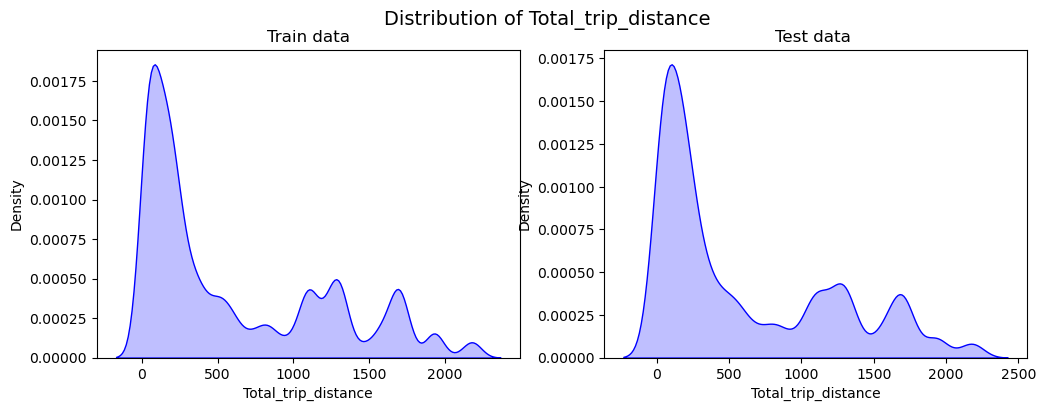

actual_time_cumulative
Skewness of train data =  1.1713119608878204
Skewness of test data =  1.178220585310997


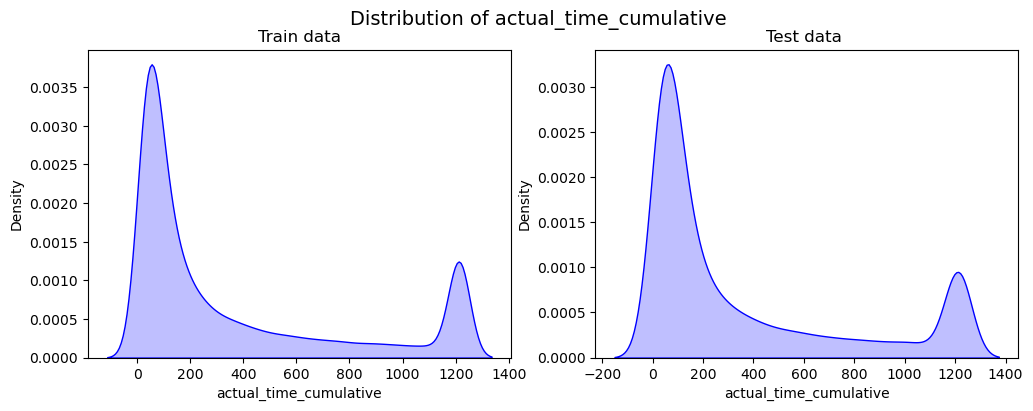

Actual_Average_Speed
Skewness of train data =  -0.6159671267698568
Skewness of test data =  -0.6264316079618955


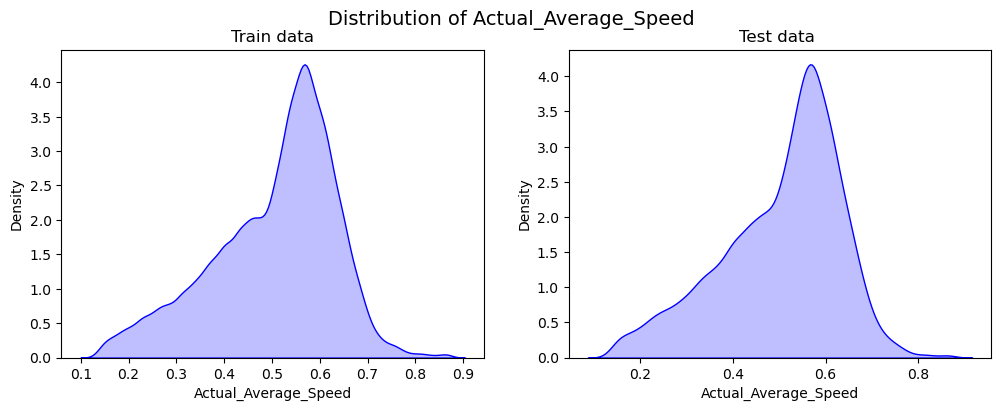

source_center_te
Skewness of train data =  0.4118130598785902
Skewness of test data =  0.3988494798756335


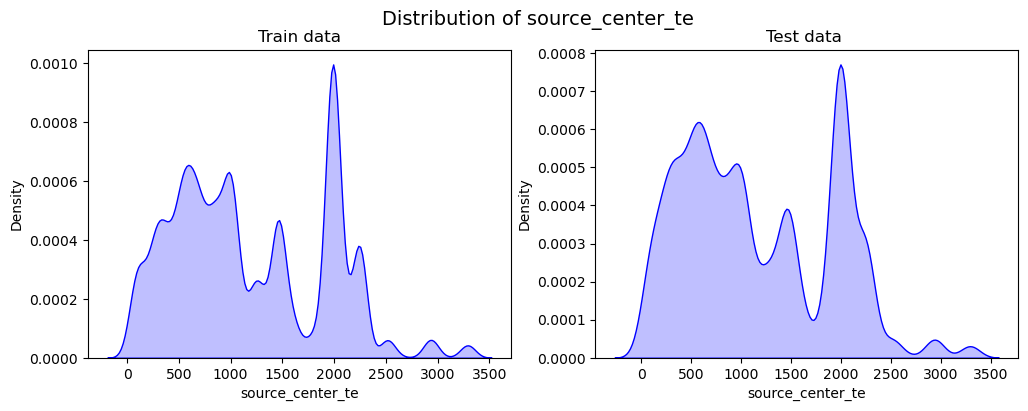

destination_center_te
Skewness of train data =  0.18042756166869936
Skewness of test data =  0.1774794649412307


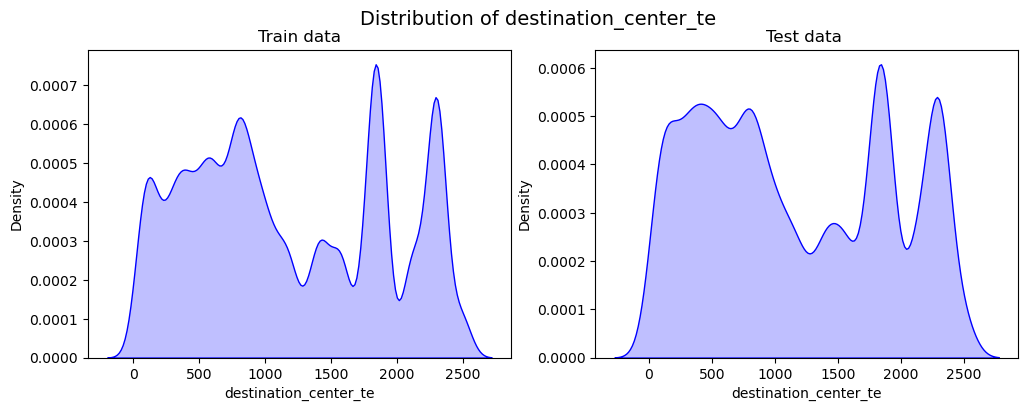

osrm_time_cumulative
Skewness of train data =  1.1449968558486687
Skewness of test data =  1.1535986942465088


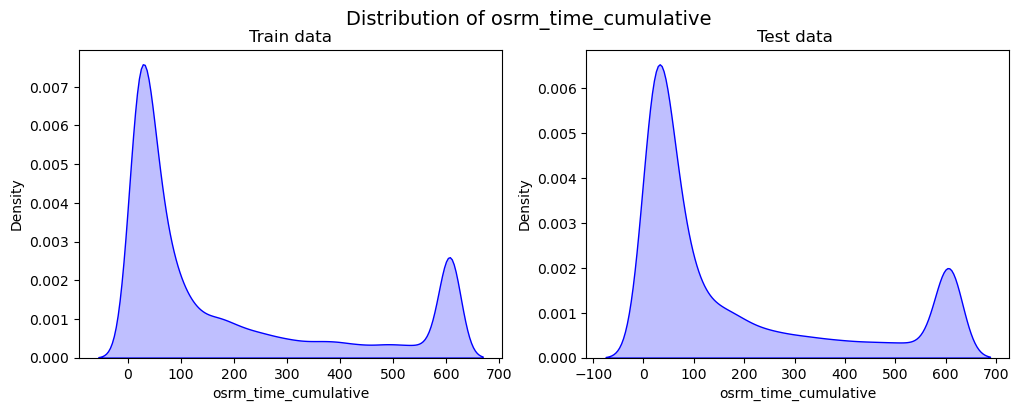

cutoff_factor
Skewness of train data =  1.9235711387984962
Skewness of test data =  1.9355126329196601


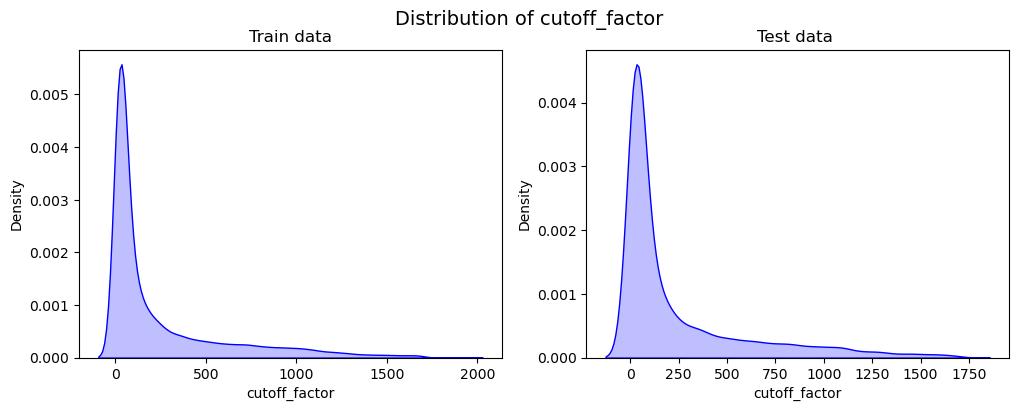

trip_creation_time_hour
Skewness of train data =  -0.2910085002669137
Skewness of test data =  -0.2606082488755615


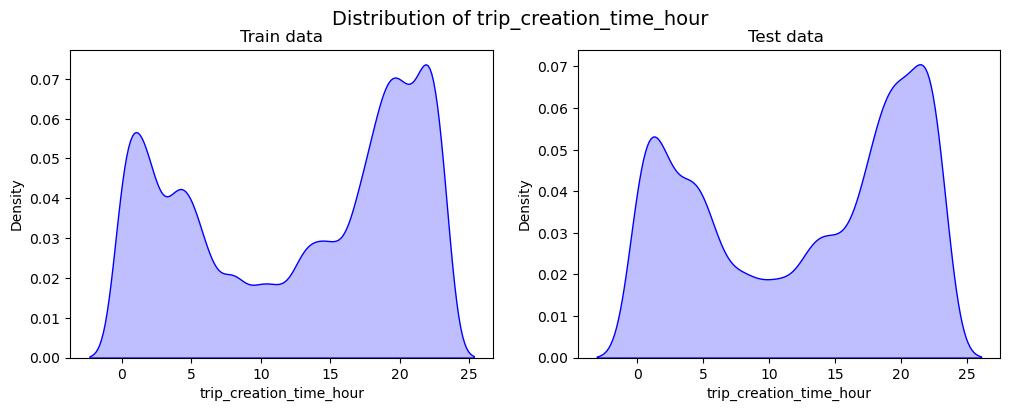

cutoff_timestamp_month
Skewness of train data =  2.0035660754197493
Skewness of test data =  2.0231836973967297


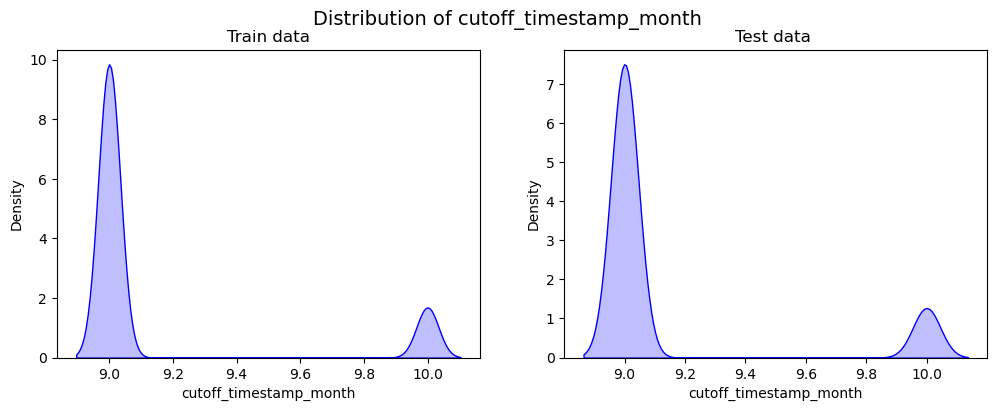

actual_distance_to_destination_cumulative
Skewness of train data =  1.1562800741603565
Skewness of test data =  1.1638397866517907


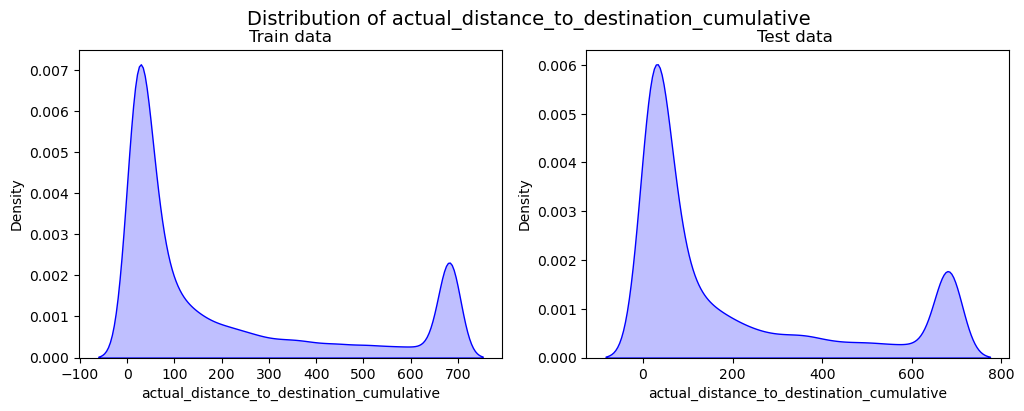

od_start_time_hour
Skewness of train data =  0.3204187808704164
Skewness of test data =  0.3477121734105545


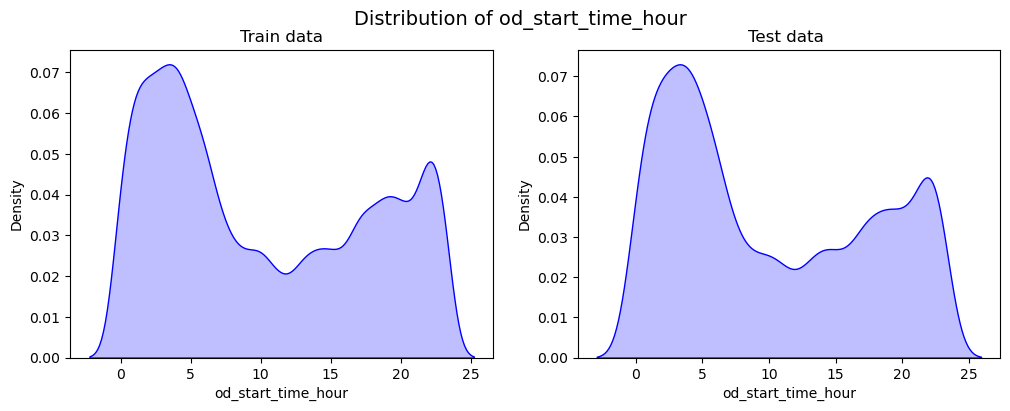

od_end_time_is_weekend
Skewness of train data =  1.0149118634160967
Skewness of test data =  1.0179841480320961


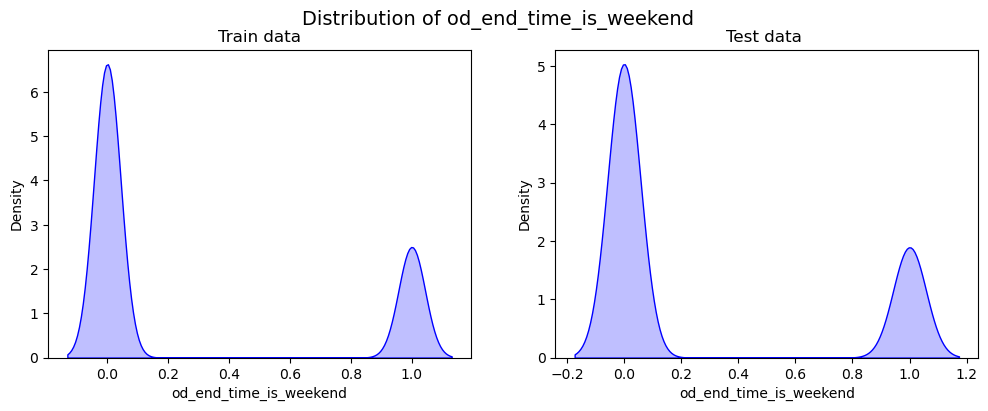

In [69]:
for col in X_train_final:
    print(col)
    print('Skewness of train data = ', skew(X_train_final[col]))
    print('Skewness of test data = ', skew(X_test_final[col]))

    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f"Distribution of {col}", fontsize=14)
    
    sns.kdeplot(X_train_final[col],ax = ax1 , fill=True, color='blue')
    ax1.set_title("Train data")

    sns.kdeplot(X_test_final[col],ax = ax2 , fill=True, color='blue')
    ax2.set_title("Test data ")
    
    plt.show()

In [71]:
import scipy.stats as stat
import pylab
from scipy.stats import boxcox

In [73]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [75]:
X_train_final.head()

,Trip_total_duration(mins),No_of_stops,Total_osrm_trip_distance,Total_osrm_trip_duration,Osrm_Average_Speed,route_type,Trip_duration(mins),Total_trip_distance,actual_time_cumulative,Actual_Average_Speed,source_center_te,destination_center_te,osrm_time_cumulative,cutoff_factor,trip_creation_time_hour,cutoff_timestamp_month,actual_distance_to_destination_cumulative,od_start_time_hour,od_end_time_is_weekend
135075,3314.0,77.0,2075.6831,1535.0,1.352237,1,3314.0,1689.258044,767.0,0.542298,1985.551640,2294.293922,431.0,484,18,9,485.210564,18,0
48411,123.0,4.0,26.4820,30.0,0.882733,0,43.0,20.700735,23.0,0.369656,138.513299,670.013734,16.0,9,0,10,9.748024,0,0
71197,870.0,25.0,594.4144,447.0,1.329786,1,435.0,491.717318,114.0,0.771927,2240.220721,627.026719,69.0,88,16,9,88.923352,16,1
129903,2562.0,58.0,1640.5117,1168.0,1.404548,1,2562.0,1269.621624,1213.5,0.552490,1982.688314,2485.501542,607.0,638,23,9,638.012150,23,1
129682,483.0,17.0,225.9497,177.0,1.276552,0,149.0,133.453572,57.0,0.394833,239.503310,298.772433,27.0,27,22,9,28.331860,22,0


Trip_total_duration(mins)


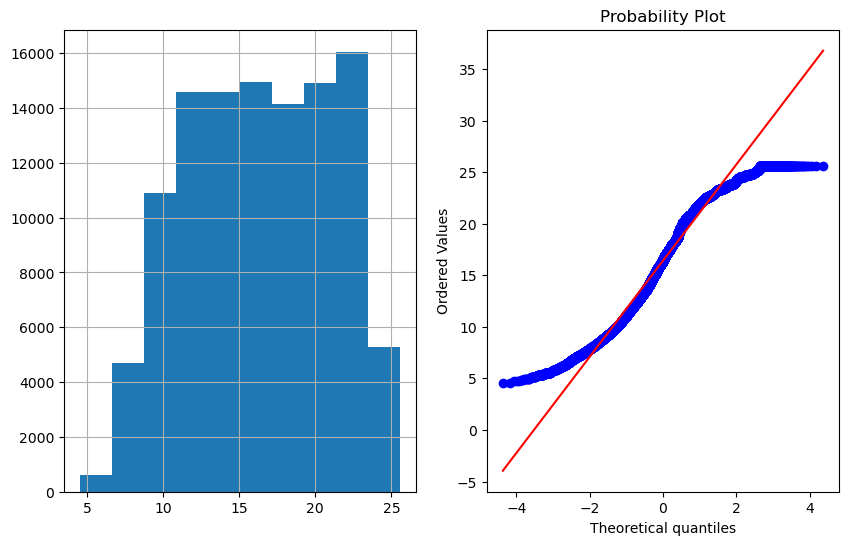

No_of_stops


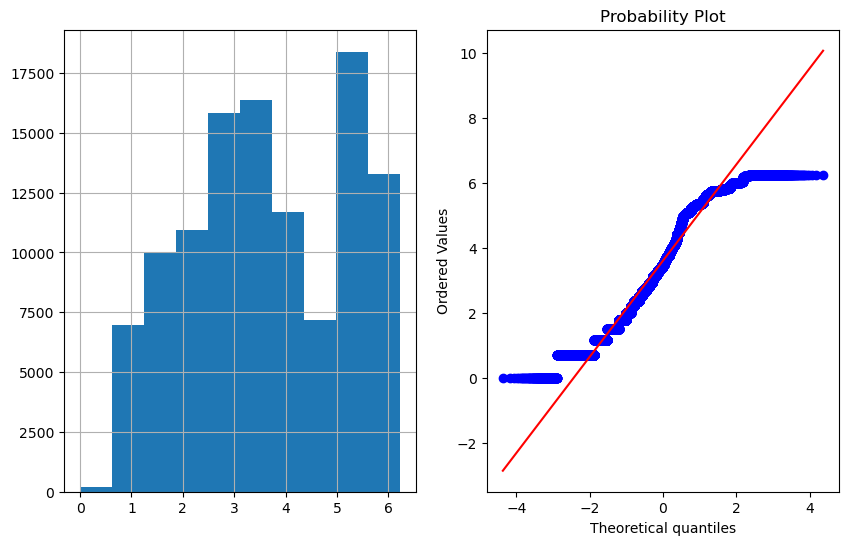

Total_osrm_trip_distance


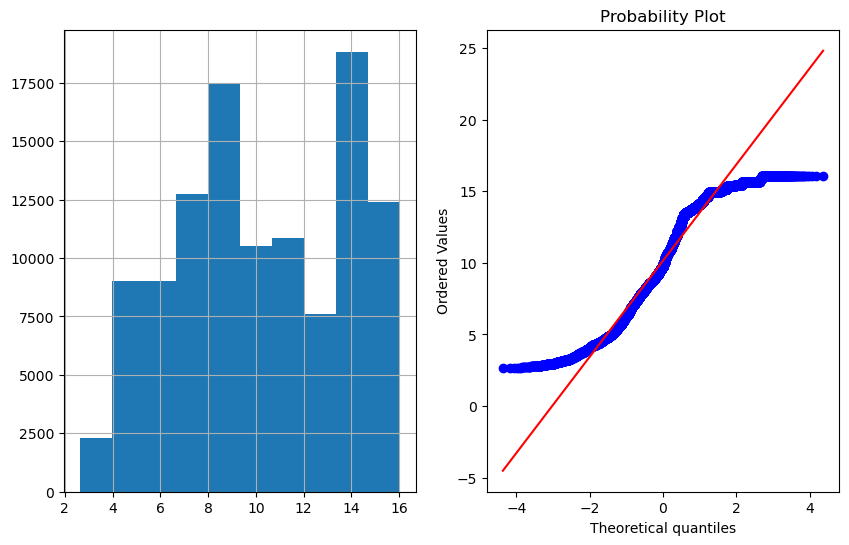

Total_osrm_trip_duration


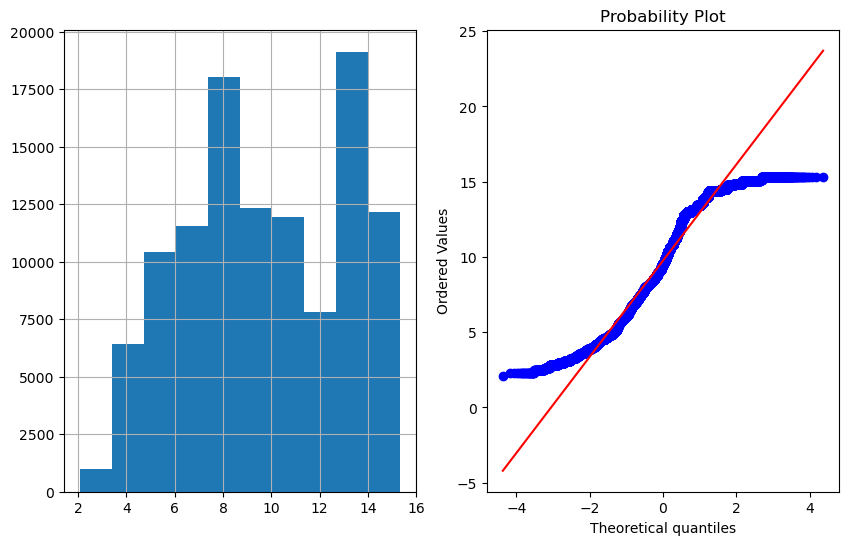

Osrm_Average_Speed


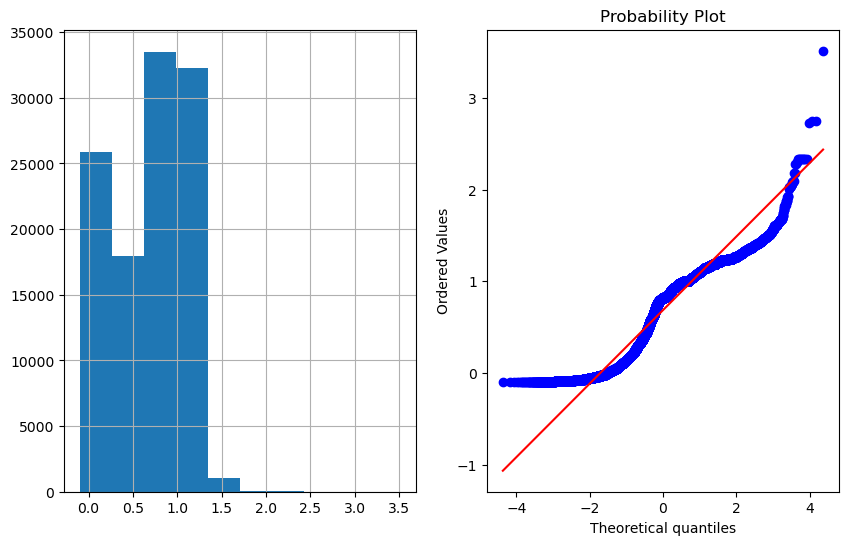

route_type
Skipping route_type (contains 0 or negative values)
Trip_duration(mins)


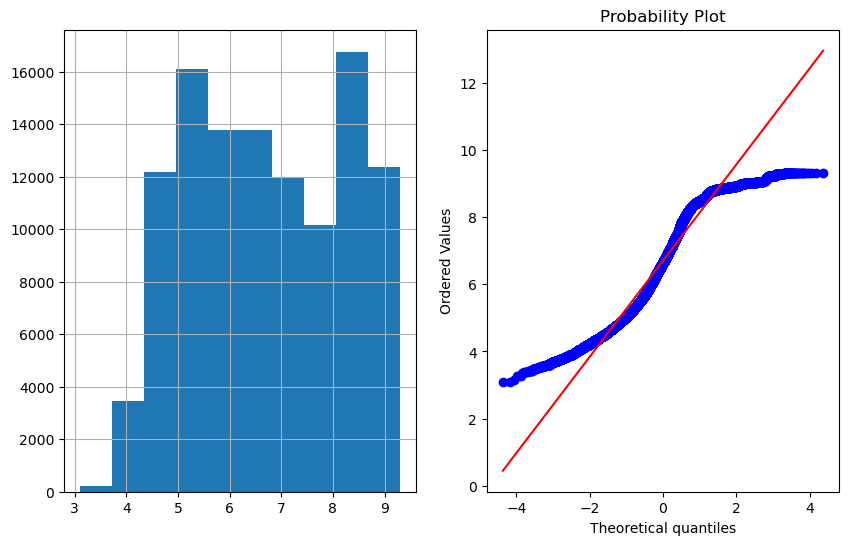

Total_trip_distance


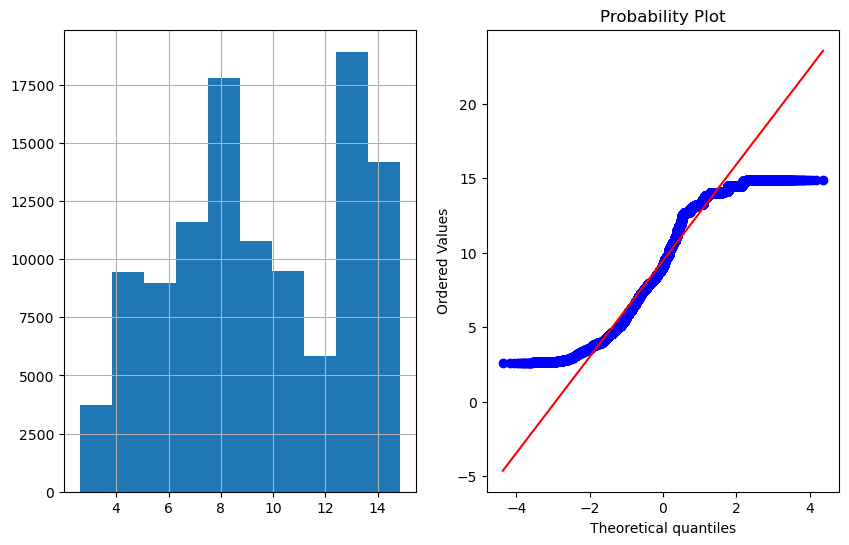

actual_time_cumulative


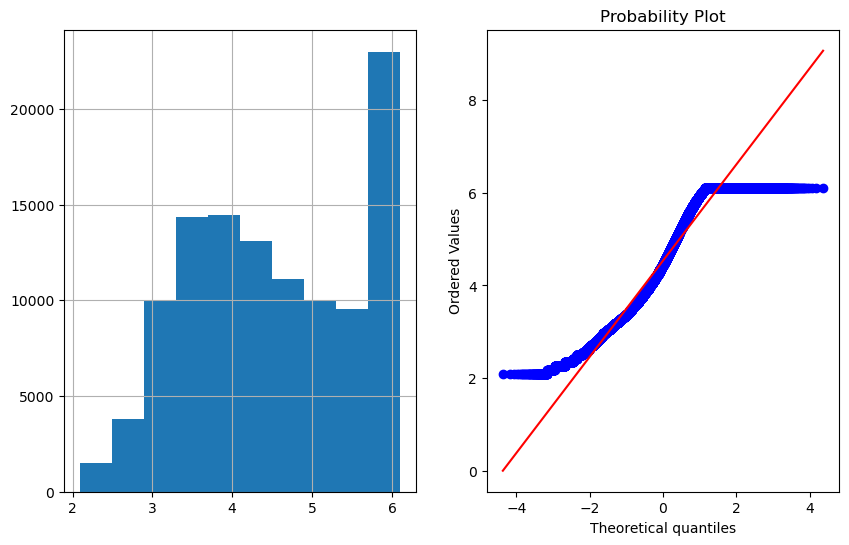

Actual_Average_Speed


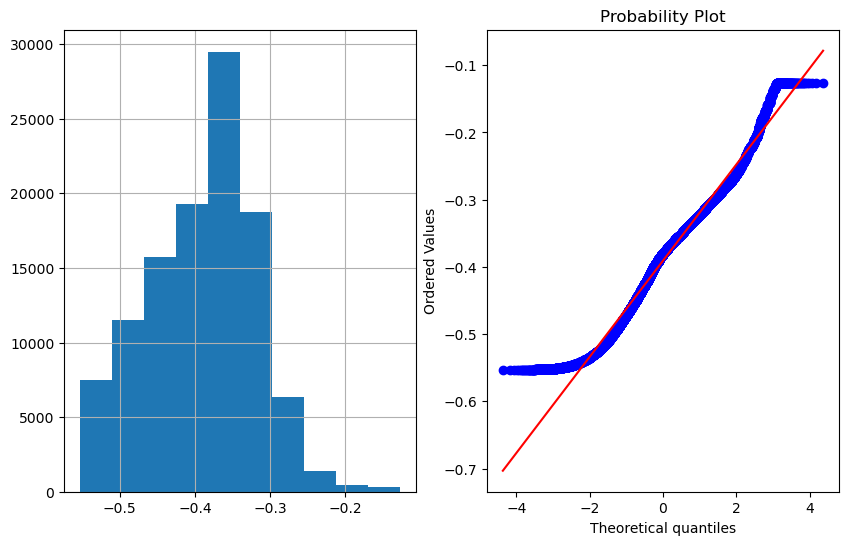

source_center_te


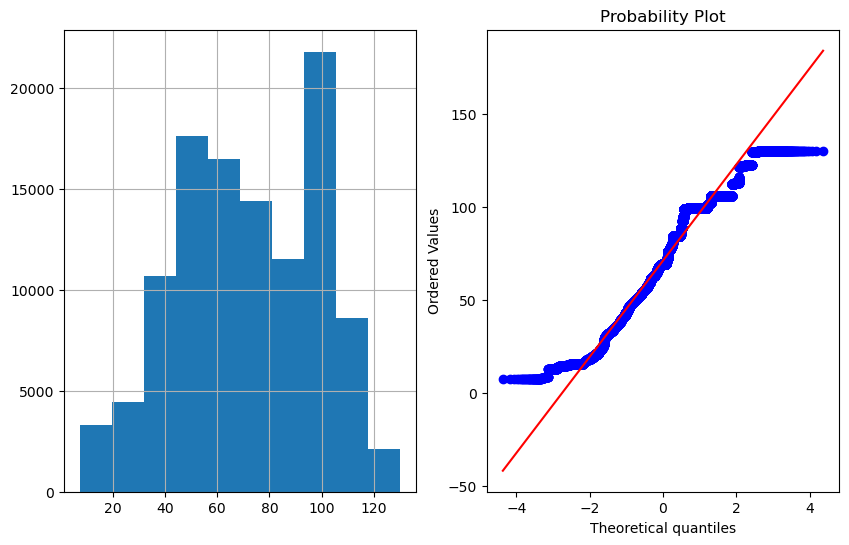

destination_center_te


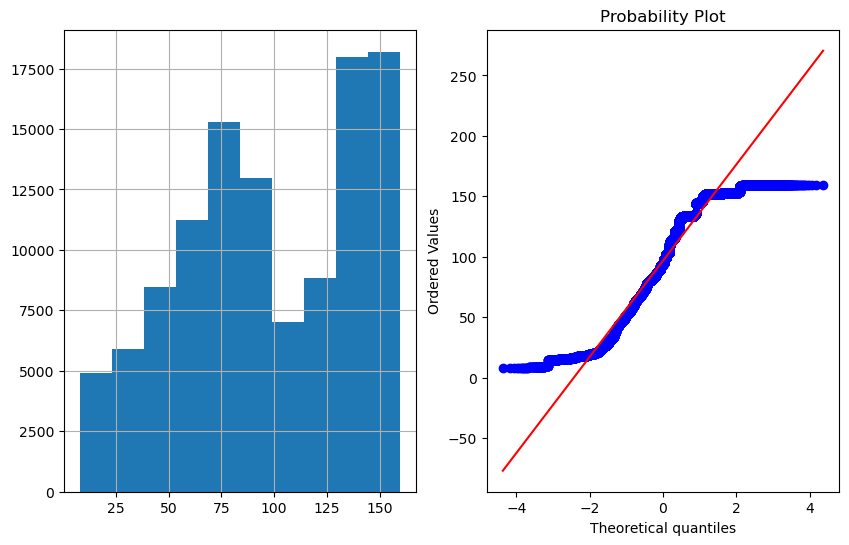

osrm_time_cumulative


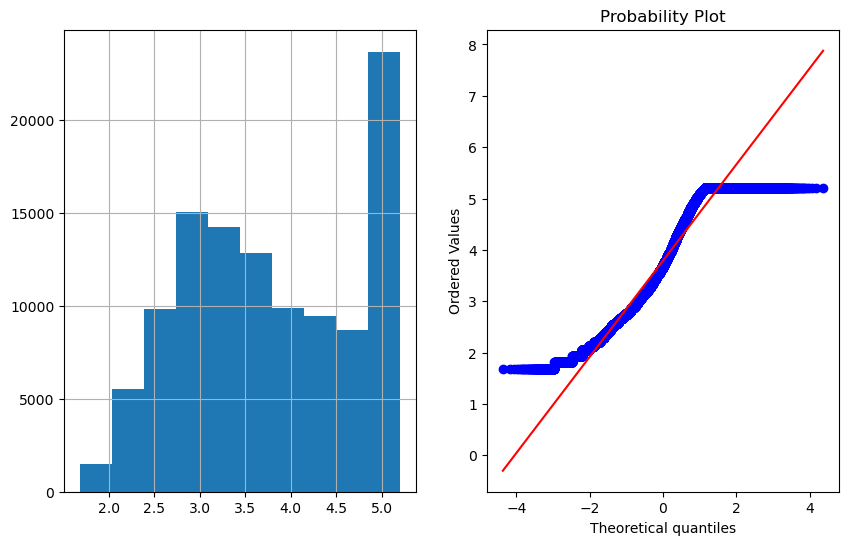

cutoff_factor


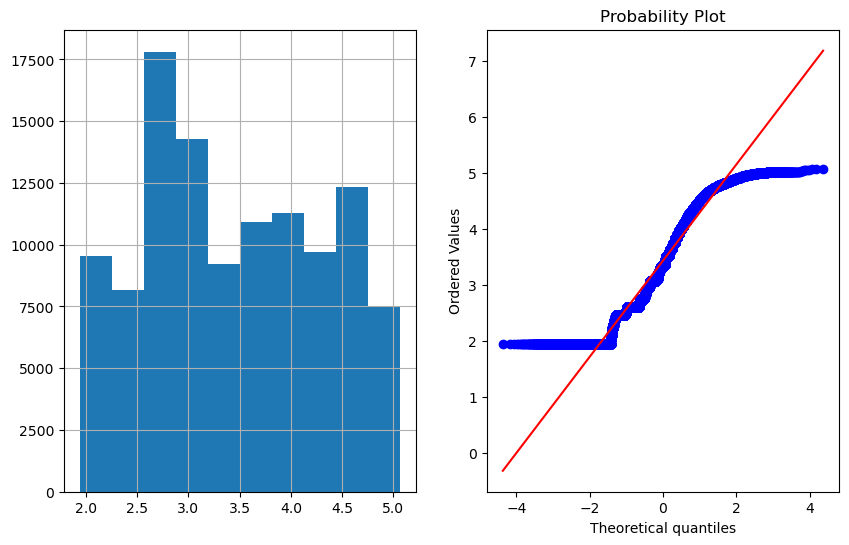

trip_creation_time_hour
Skipping trip_creation_time_hour (contains 0 or negative values)
cutoff_timestamp_month


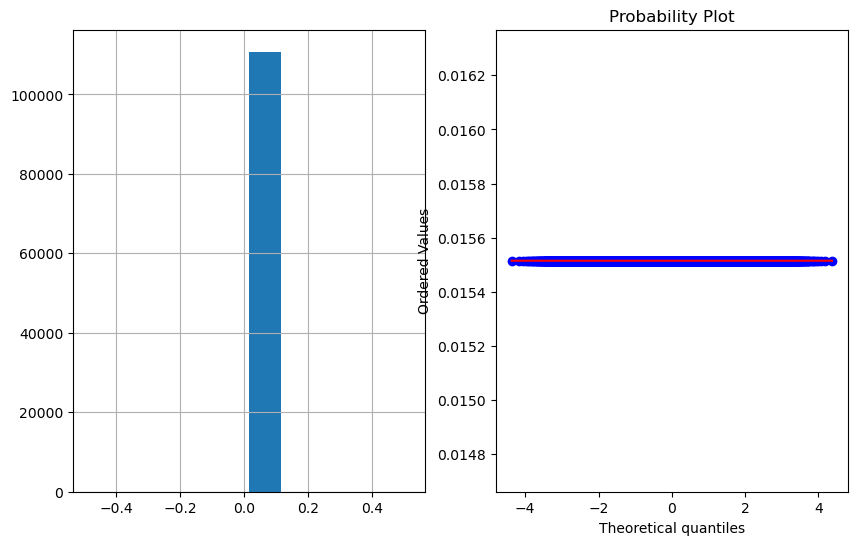

actual_distance_to_destination_cumulative


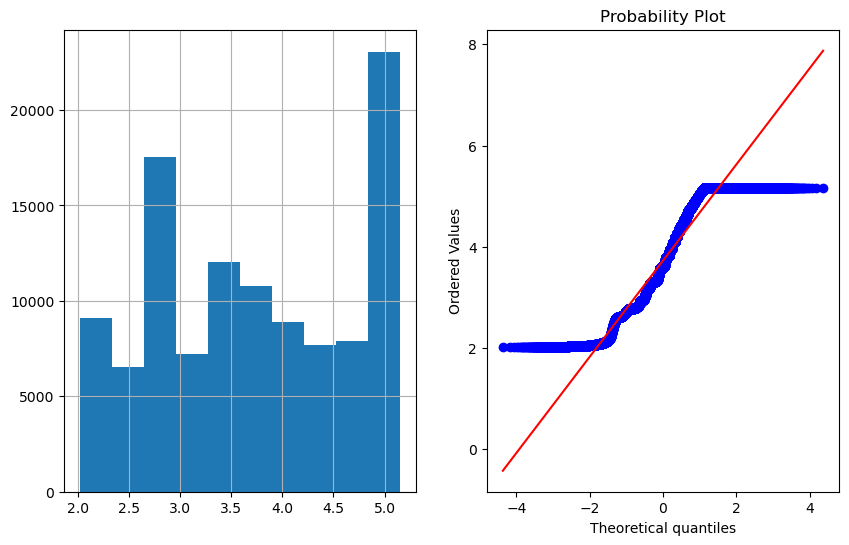

od_start_time_hour
Skipping od_start_time_hour (contains 0 or negative values)
od_end_time_is_weekend
Skipping od_end_time_is_weekend (contains 0 or negative values)


In [78]:
from scipy.stats import boxcox

boxcox_lambdas = {}
for col in X_train_final:
    print(col)
    
    if (X_train_final[col] <= 0).any():
        print(f"Skipping {col} (contains 0 or negative values)")
        continue
    
    # Step 2: Apply Box-Cox transformation
    transformed, fitted_lambda = boxcox(X_train_final[col])
    
    # Step 3: Replace the original column with transformed values
    X_train_final[col] = transformed
    boxcox_lambdas[col] = fitted_lambda  # Save λ for test data
    
    # Step 4: Plot to visualize the effect
    plot_data(X_train_final, col)
    
    

In [80]:
from scipy.special import boxcox1p  # safer version for test data

for col, lam in boxcox_lambdas.items():
    if col in X_test_final:
        X_test_final[col] = boxcox1p(X_test_final[col] - 1, lam)  # shift to match training data if needed


Trip_total_duration(mins)


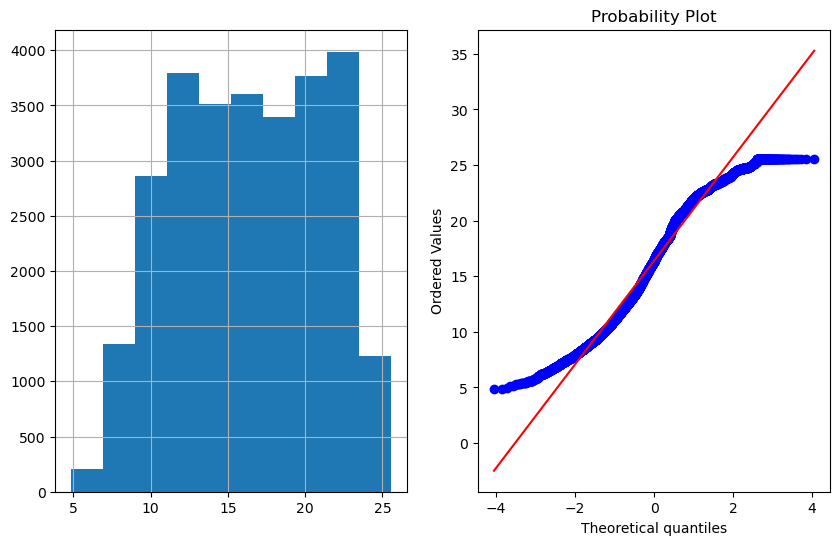

No_of_stops


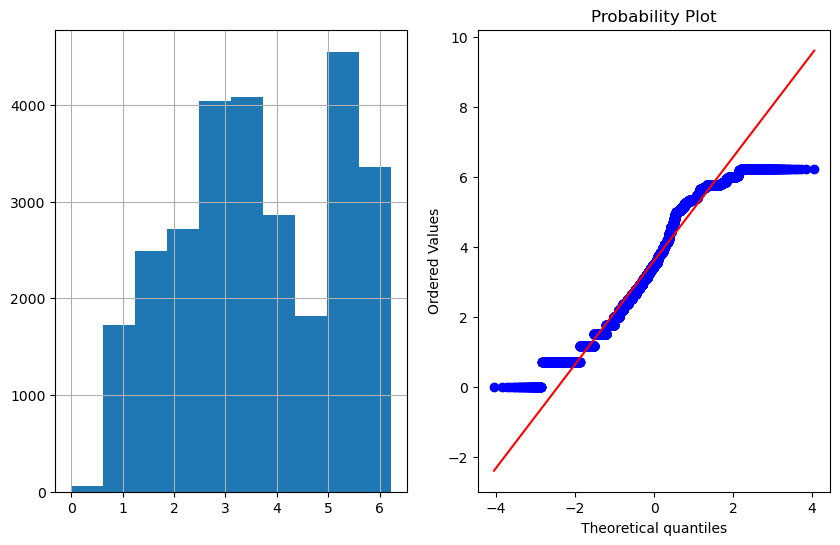

Total_osrm_trip_distance


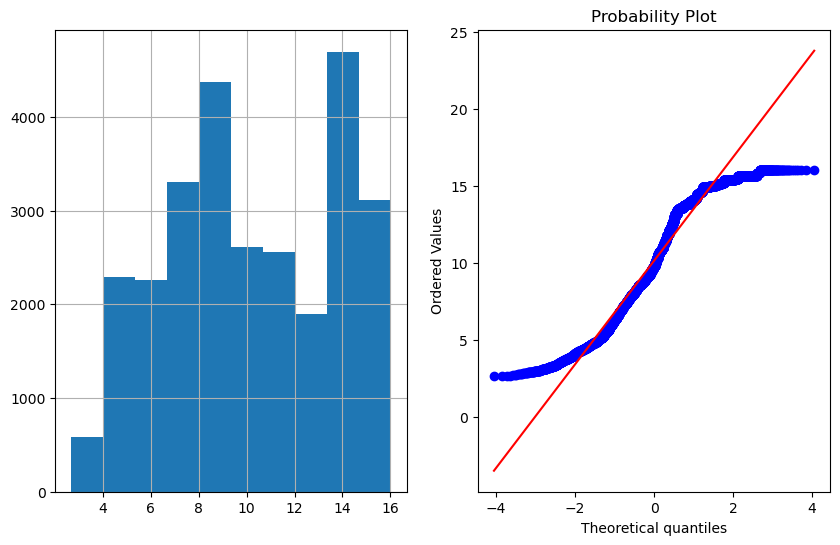

Total_osrm_trip_duration


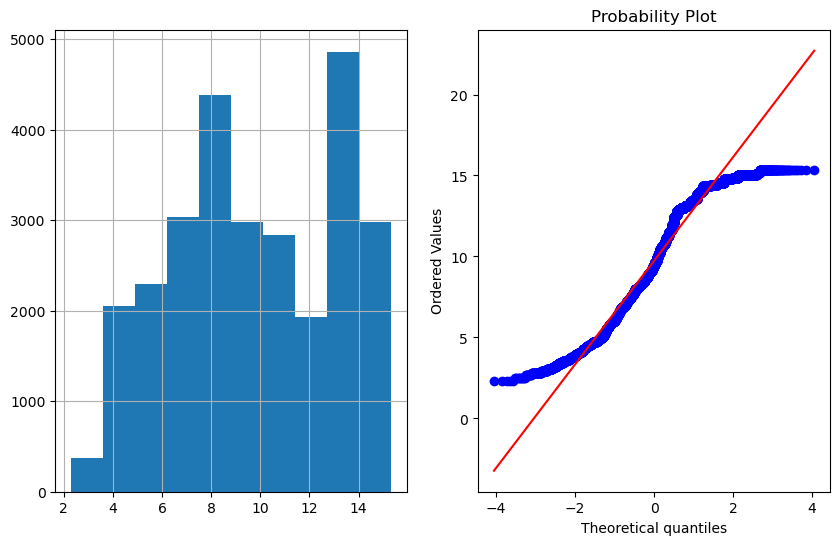

Osrm_Average_Speed


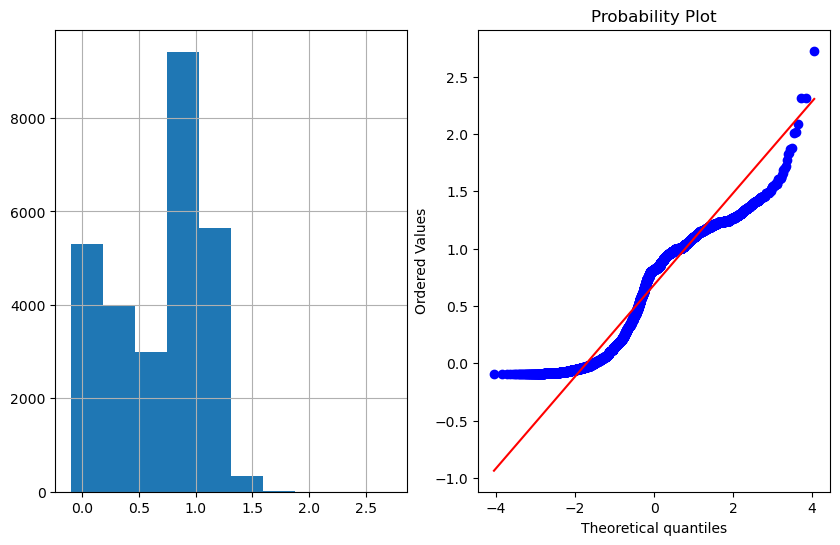

route_type


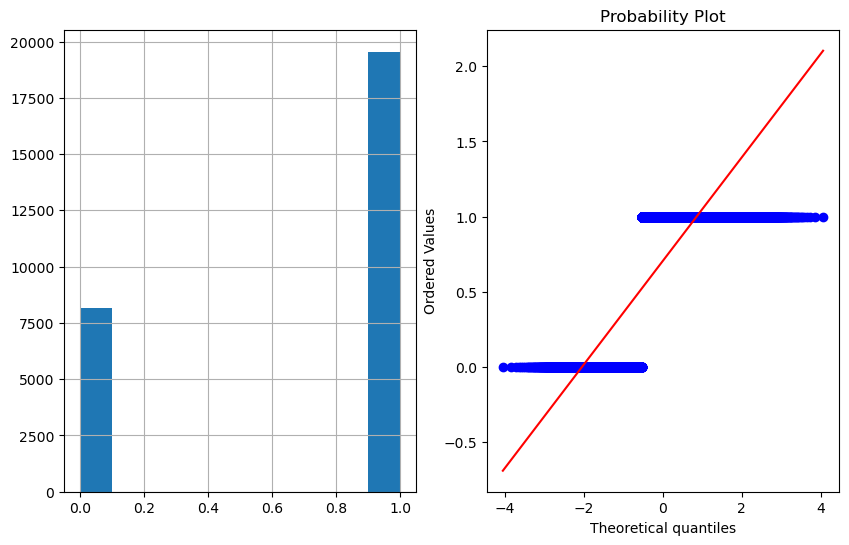

Trip_duration(mins)


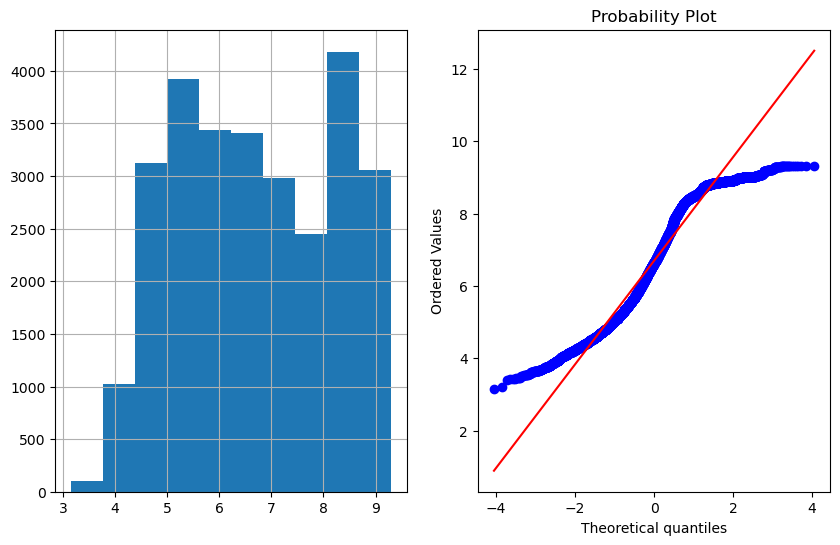

Total_trip_distance


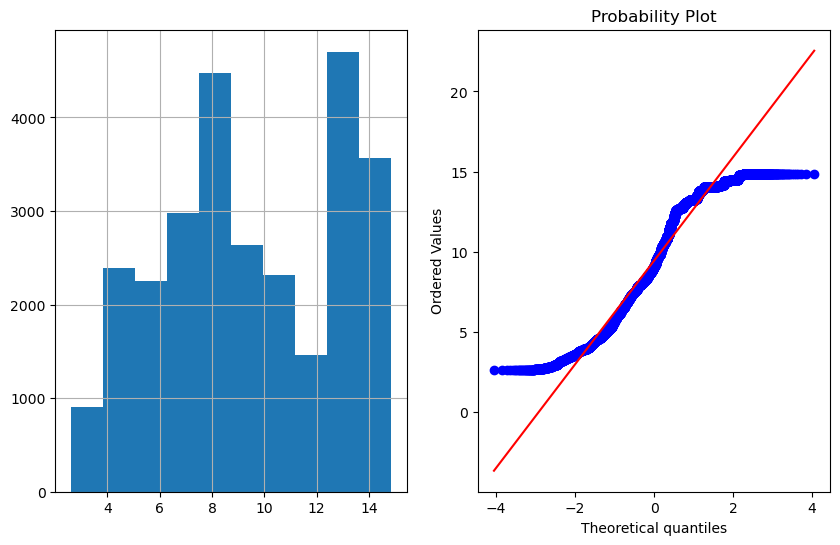

actual_time_cumulative


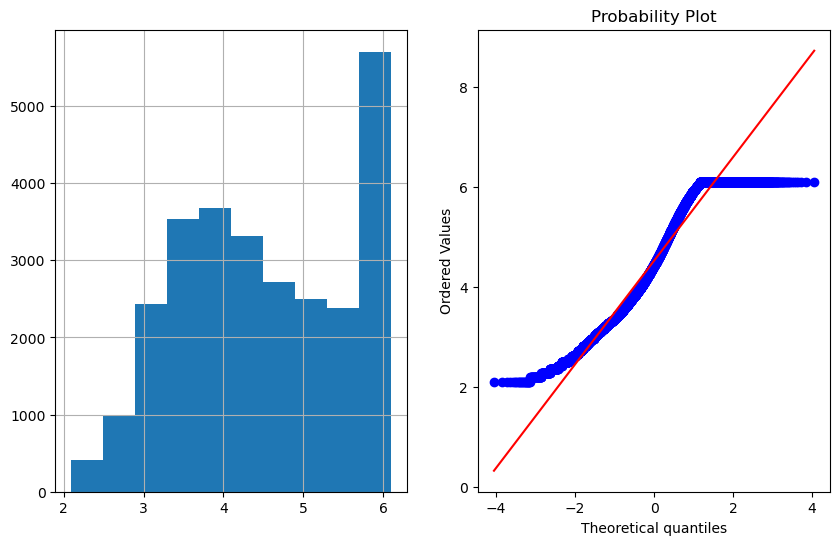

Actual_Average_Speed


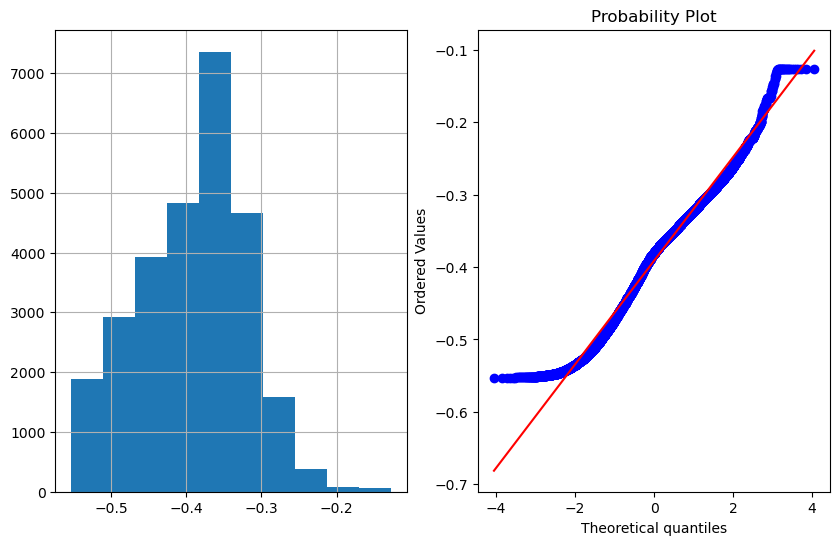

source_center_te


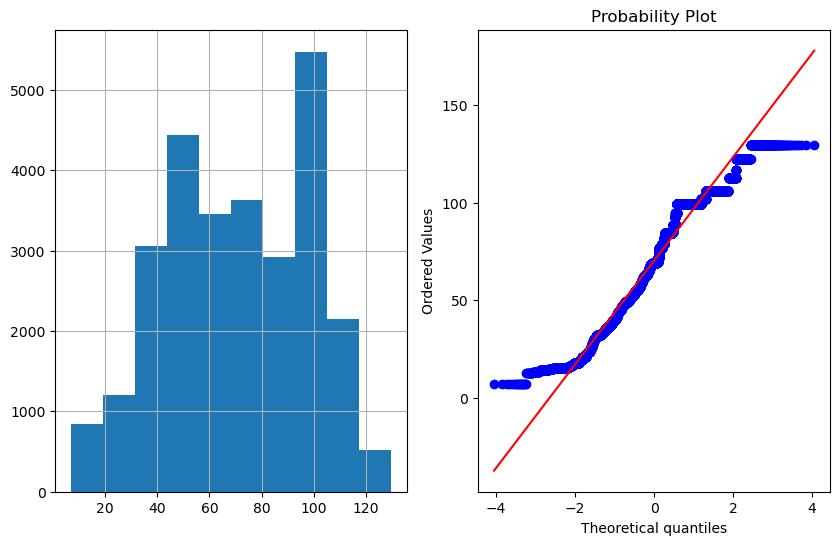

destination_center_te


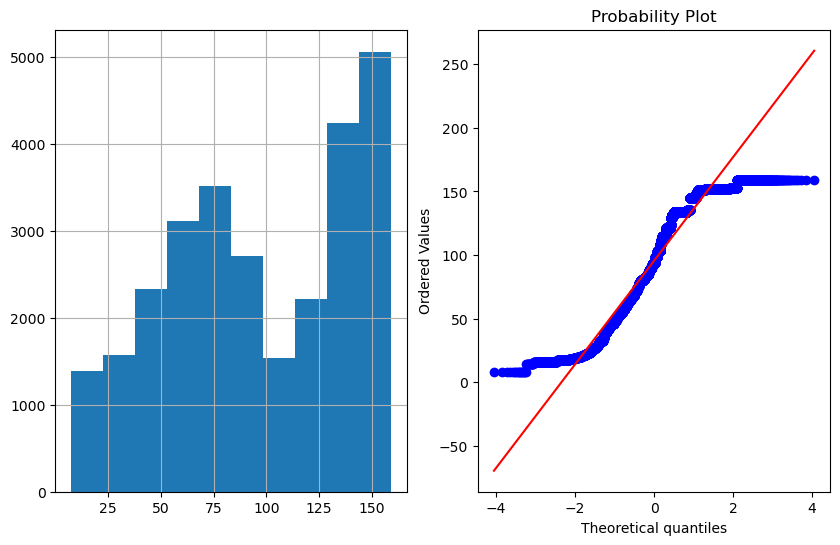

osrm_time_cumulative


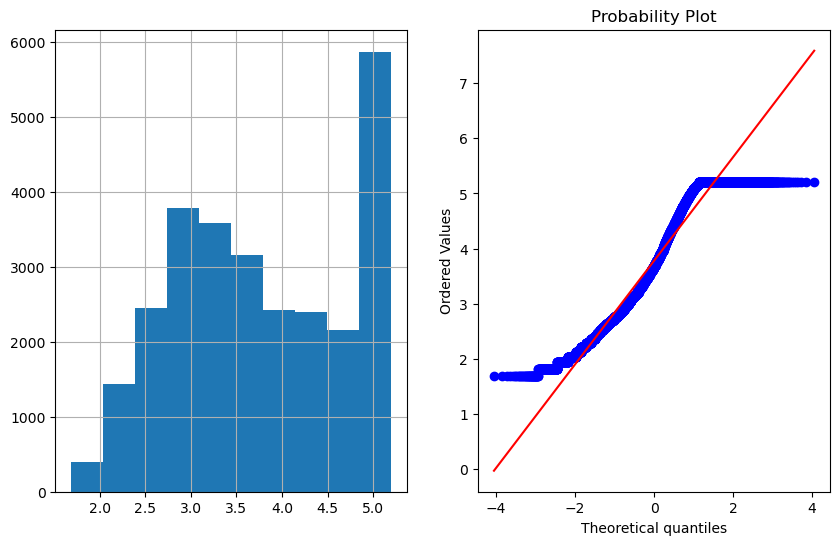

cutoff_factor


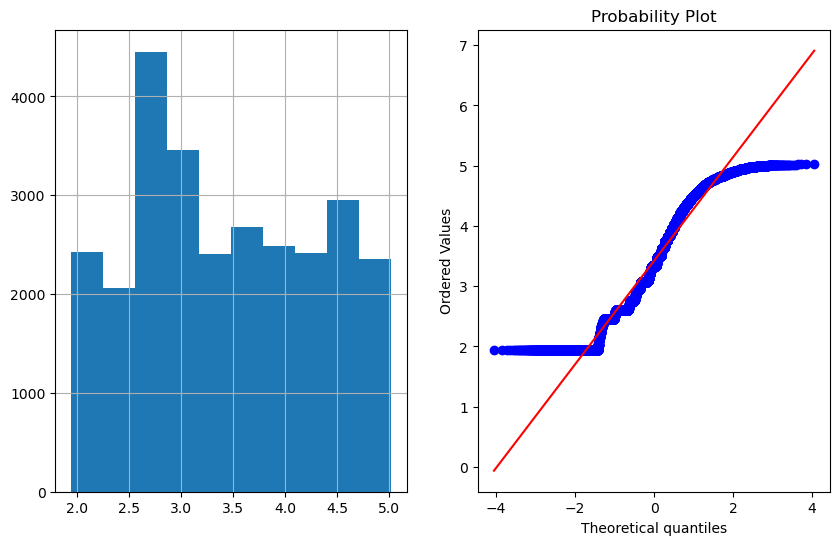

trip_creation_time_hour


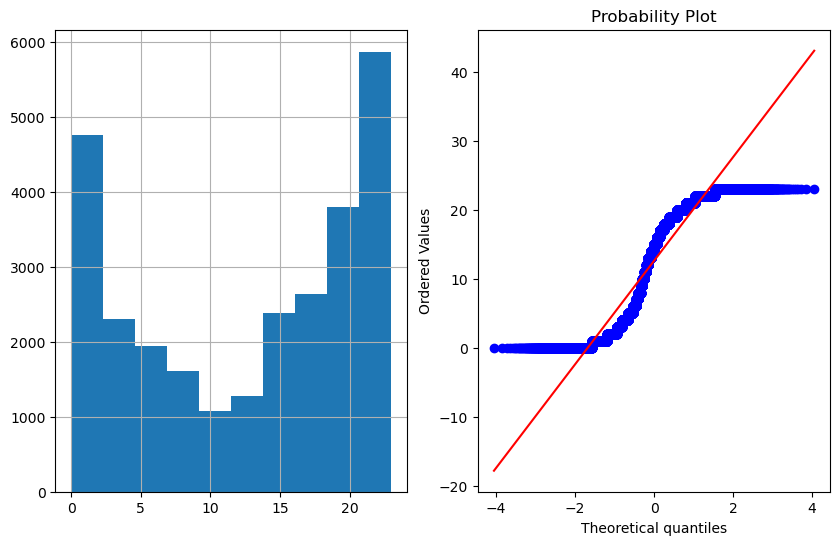

cutoff_timestamp_month


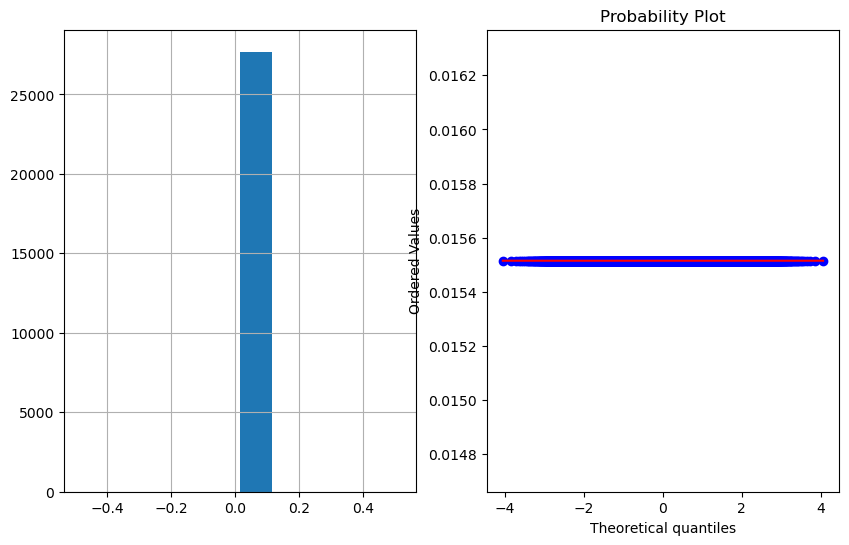

actual_distance_to_destination_cumulative


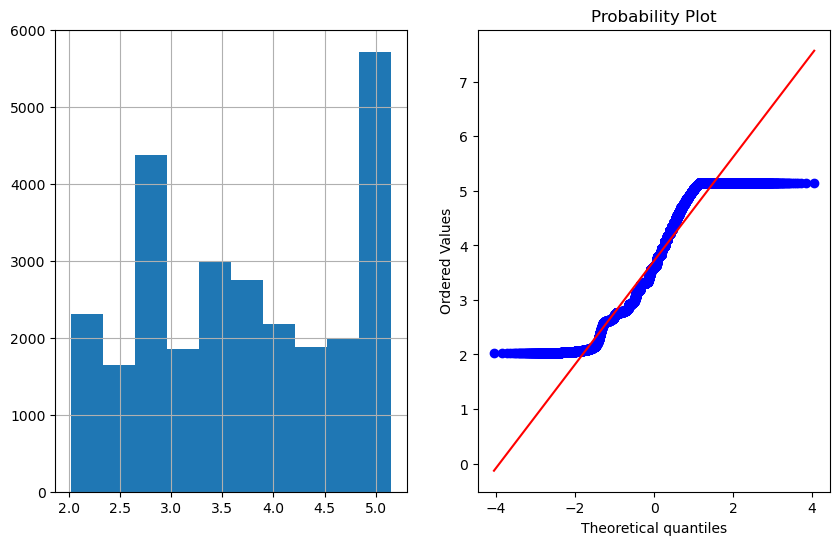

od_start_time_hour


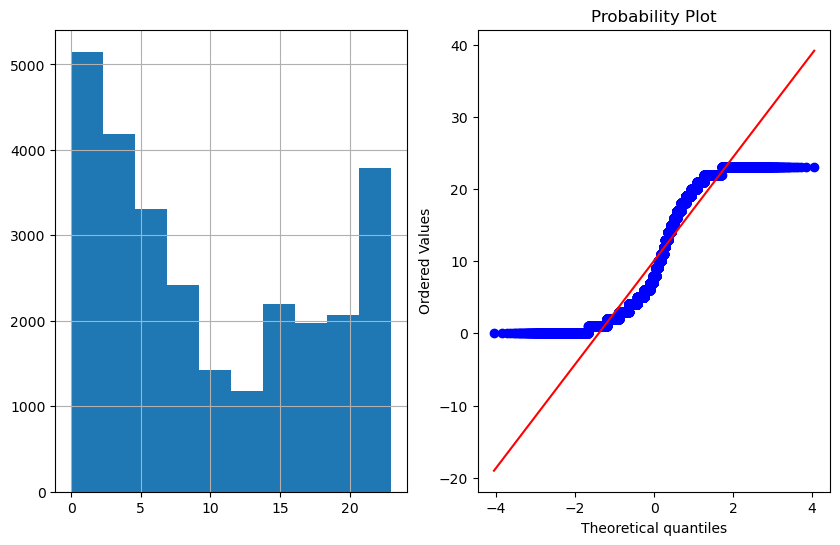

od_end_time_is_weekend


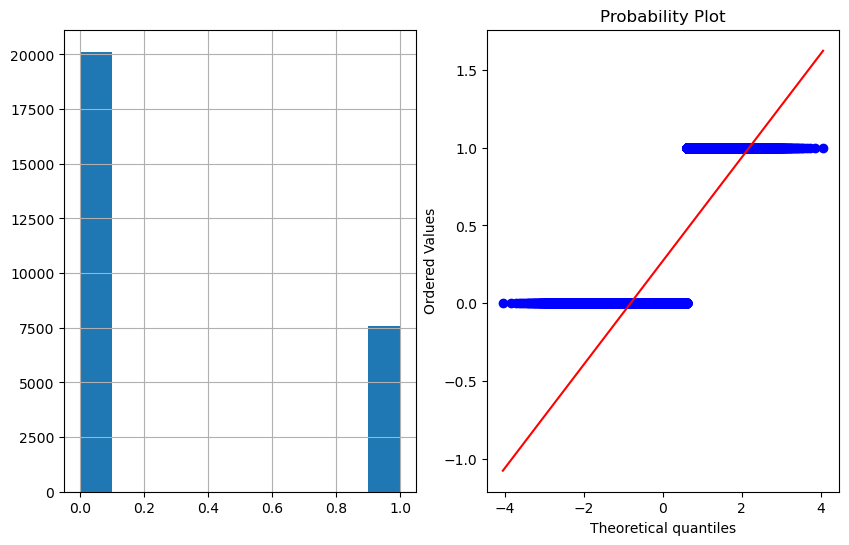

In [82]:
# plotting for x_test data
for col in X_test_final:
    print(col)
    plot_data(X_test_final, col)

In [84]:
X_train_final.head()

,Trip_total_duration(mins),No_of_stops,Total_osrm_trip_distance,Total_osrm_trip_duration,Osrm_Average_Speed,route_type,Trip_duration(mins),Total_trip_distance,actual_time_cumulative,Actual_Average_Speed,source_center_te,destination_center_te,osrm_time_cumulative,cutoff_factor,trip_creation_time_hour,cutoff_timestamp_month,actual_distance_to_destination_cumulative,od_start_time_hour,od_end_time_is_weekend
135075,22.878655,5.758963,14.957293,14.366672,0.928939,1,8.925849,14.021587,5.765343,-0.375286,99.303884,151.920605,4.976758,4.436284,18,0.015515,4.942357,18,0
48411,8.635500,1.512866,4.306514,4.574832,-0.085735,0,3.931716,3.873487,2.930176,-0.470729,23.260211,73.492765,2.528379,1.943595,0,0.015515,2.092229,0,0
71197,15.817314,3.957805,11.113227,10.583898,0.818118,1,6.528501,10.444332,4.278229,-0.208084,105.892612,70.653524,3.682314,3.506434,16,0.015515,3.807063,16,1
129903,21.351175,5.281273,14.174119,13.460671,1.229170,1,8.615650,13.131601,6.105123,-0.368813,99.227580,159.226050,5.201429,4.570667,23,0.015515,5.112298,23,1
129682,13.318720,3.396034,8.624547,8.212688,0.592923,0,5.308750,7.342319,3.706042,-0.458529,31.600612,45.350225,2.954661,2.747340,22,0.015515,2.955552,22,0


In [86]:
correlations = pd.DataFrame({
    'feature': X_train_final.columns,
    'corr_with_target': [abs(np.corrcoef(X_train_final[col], y_train)[0,1]) for col in X_train_final.columns]
}).sort_values('corr_with_target', ascending=False)

print(correlations.head(10))


                                      feature  corr_with_target
0                   Trip_total_duration(mins)          0.911590
3                    Total_osrm_trip_duration          0.910491
2                    Total_osrm_trip_distance          0.910157
7                         Total_trip_distance          0.907048
1                                 No_of_stops          0.901411
6                         Trip_duration(mins)          0.828583
13                              cutoff_factor          0.754774
16  actual_distance_to_destination_cumulative          0.751556
12                       osrm_time_cumulative          0.740987
8                      actual_time_cumulative          0.730703


In [88]:
# checking skewness of the X_train data
for col in X_train_final:
    print(col)
    Skewness = skew(X_train_final[col])
    print('Skewness = ', Skewness )
    if Skewness <=(0.5) and Skewness >=(-0.5):
        print(f'Column {col} is fairly symmetrical')
        print("-"*30)
    elif Skewness >=(1) and Skewness >=(-1):
        print(f'Column {col} is highly skewed')
        print("-"*30)
    else:
        print(f'Column {col} is moderately skewed')
        print("-"*30)
    

Trip_total_duration(mins)
Skewness =  -0.08418144155902095
Column Trip_total_duration(mins) is fairly symmetrical
------------------------------
No_of_stops
Skewness =  -0.04768159364465344
Column No_of_stops is fairly symmetrical
------------------------------
Total_osrm_trip_distance
Skewness =  -0.08362202338480458
Column Total_osrm_trip_distance is fairly symmetrical
------------------------------
Total_osrm_trip_duration
Skewness =  -0.08029841355329574
Column Total_osrm_trip_duration is fairly symmetrical
------------------------------
Osrm_Average_Speed
Skewness =  -0.3646386820142696
Column Osrm_Average_Speed is fairly symmetrical
------------------------------
route_type
Skewness =  -0.924497372089072
Column route_type is moderately skewed
------------------------------
Trip_duration(mins)
Skewness =  -0.012461293361039022
Column Trip_duration(mins) is fairly symmetrical
------------------------------
Total_trip_distance
Skewness =  -0.08473802287575963
Column Total_trip_dista

C:\Users\AYUSH GUPTA\AppData\Local\Temp\ipykernel_20216\2790963786.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Skewness = skew(X_train_final[col])


In [90]:
# checking skewness of the X_test data

for col in X_test_final:
    print(col)
    Skewness = skew(X_test_final[col])
    print('Skewness = ', Skewness )
    if Skewness <=(0.5) and Skewness >=(-0.5):
        print(f'Column {col} is fairly symmetrical')
        print("-"*30)
    elif Skewness >=(1) and Skewness >=(-1):
        print(f'Column {col} is highly skewed')
        print("-"*30)
    else:
        print(f'Column {col} is moderately skewed')
        print("-"*30)

Trip_total_duration(mins)
Skewness =  -0.06711198508489309
Column Trip_total_duration(mins) is fairly symmetrical
------------------------------
No_of_stops
Skewness =  -0.04012018941537674
Column No_of_stops is fairly symmetrical
------------------------------
Total_osrm_trip_distance
Skewness =  -0.07164599785888023
Column Total_osrm_trip_distance is fairly symmetrical
------------------------------
Total_osrm_trip_duration
Skewness =  -0.06927867501470351
Column Total_osrm_trip_duration is fairly symmetrical
------------------------------
Osrm_Average_Speed
Skewness =  -0.3721182600422149
Column Osrm_Average_Speed is fairly symmetrical
------------------------------
route_type
Skewness =  -0.9037747118405782
Column route_type is moderately skewed
------------------------------
Trip_duration(mins)
Skewness =  -0.007339199825121898
Column Trip_duration(mins) is fairly symmetrical
------------------------------
Total_trip_distance
Skewness =  -0.0725809646416109
Column Total_trip_dista

C:\Users\AYUSH GUPTA\AppData\Local\Temp\ipykernel_20216\2989251523.py:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Skewness = skew(X_test_final[col])


# Feature Scaling

In [445]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
# Fitting and transforming training data
X_train_scaled = standard.fit_transform(X_train_final)
# transforming test data

# CHANGE NEED TO MADE HERE FIT_TRANSFORM ------> TRANSFORM 
X_test_scaled = standard.transform(X_test_final)


In [447]:
X_test_scaled

array([[-0.60365708,  0.1062256 , -0.48741598, ..., -0.57388629,
        -0.6811623 , -0.61393228],
       [ 1.3989636 ,  1.34885406,  1.28012826, ...,  0.84255533,
         0.10978818, -0.61393228],
       [-0.24874829, -0.62438274, -0.48189014, ..., -0.78401147,
        -0.81298739, -0.61393228],
       ...,
       [ 0.92084444,  0.968366  ,  0.99940568, ...,  1.17614635,
        -0.6811623 , -0.61393228],
       [ 1.22718252,  1.42484899,  1.40183995, ...,  1.45277269,
        -1.20846263, -0.61393228],
       [ 0.40642961, -0.46174402,  0.00713792, ..., -0.61205156,
        -1.20846263,  1.62884414]])

In [449]:
X_train_scaled

array([[ 1.36733216,  1.42484899,  1.39771176, ...,  1.23821508,
         1.03256375, -0.61393228],
       [-1.64262117, -1.38821735, -1.69983868, ..., -1.65940326,
        -1.34028771, -0.61393228],
       [-0.12491496,  0.23157057,  0.27974756, ...,  0.08400417,
         0.76891358,  1.62884414],
       ...,
       [ 0.87057643,  0.98936095,  0.88373528, ..., -0.66004487,
         0.76891358, -0.61393228],
       [-0.43303746, -0.62438274, -0.1681792 , ...,  0.10019118,
        -0.6811623 , -0.61393228],
       [-0.0053817 , -0.19750606, -0.20137148, ...,  0.31796349,
         1.16438883, -0.61393228]])

In [451]:
import pickle

# Save scaled training data
with open("X_train_scaled.pkl", "wb") as f:
    pickle.dump(X_train_scaled, f)

In [455]:
# Save scaled testdata
with open("X_test_scaled.pkl", "wb") as f:
    pickle.dump(X_test_scaled, f)

In [457]:
# Save Y test 
with open("y_train.pkl", "wb") as f:
    pickle.dump(y_train, f)

In [459]:
# Save Y train
with open("y_test.pkl", "wb") as f:
    pickle.dump(y_test, f)

# Model Training


In [326]:
"""Lasso
Random forest 
Xgboost
light gbm"""

'Lasso\nRandom forest\nXgboost\nlight gbm'

In [ ]:
# # Hyperparameter tuning for Lasso (GridSearchCV)
# # -----------------------------
# lasso_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
# lasso_gs = GridSearchCV(
#     estimator=Lasso(max_iter=10000),
#     param_grid=lasso_grid,
#     cv=5,
#     scoring='r2'
# )
# lasso_gs.fit(X_train_scaled, y_train)

In [328]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import uniform
import numpy as np


In [ ]:
# Using Grid search hyperparametrer tuning

In [332]:
# Define parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize model
lasso = Lasso(max_iter=10000)

# Grid search
grid = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train)

# 'neg_mean_squared_error' = Negative of MSE -> Penalizes large errors; commonly used in most regression tasks


# Best model
best_lasso_grid = grid.best_estimator_

# Evaluate
y_pred_grid = best_lasso_grid.predict(X_test_scaled)
print("GridSearchCV R2 Score:", r2_score(y_test, y_pred_grid))
print("GridSearchCV RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_grid)))
print("Best alpha:", grid.best_params_['alpha'])


F:\New folder\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.879e+09, tolerance: 1.031e+07
  model = cd_fast.enet_coordinate_descent(
F:\New folder\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.908e+09, tolerance: 1.027e+07
  model = cd_fast.enet_coordinate_descent(
F:\New folder\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.954e+09, tolerance: 1.029e+07
  model = cd_fast.en

GridSearchCV R2 Score: 0.7488990497894614
GridSearchCV RMSE: 541.3214073727285
Best alpha: 0.001


F:\New folder\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.674e+09, tolerance: 1.286e+07
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Using Randomized search hyperparametrer tuning

In [340]:
# Define parameter distribution
param_dist = {'alpha': uniform(0.01,100)}

# Randomized search
random_search = RandomizedSearchCV(lasso, param_distributions=param_dist,
                                   n_iter=20, cv=5, scoring='neg_mean_squared_error',
                                   random_state=42)
random_search.fit(X_train_scaled, y_train)

# Best model
best_lasso_random = random_search.best_estimator_

# Evaluate
y_pred_random = best_lasso_random.predict(X_test_scaled)
print("RandomizedSearchCV R2 Score:", r2_score(y_test, y_pred_random))
print("RandomizedSearchCV RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_random)))
print("Best alpha:", random_search.best_params_['alpha'])


RandomizedSearchCV R2 Score: 0.9101967828878522
RandomizedSearchCV RMSE: 323.72554578490224
Best alpha: 2.0684494295802445


In [345]:
from sklearn.ensemble import RandomForestRegressor

In [353]:
# Define the model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],            # Number of trees
    'max_depth': [None, 10, 20, 30],            # Depth of tree
    'min_samples_split': [2, 5, 10],            # Min samples to split an internal node
    'min_samples_leaf': [1, 2, 4],              # Min samples at a leaf node
    'max_features': ['sqrt', 'log2',1]          # Features to consider at each split
}

# Grid Search
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_grid,
                                   n_iter=20,   # Number of parameter settings that are sampled.
                                   scoring='neg_mean_squared_error',
                                   cv=5,
                                   n_jobs=-1, # Number of jobs to run in parallel( -1 means using all processors)
                                   random_state=42,
                                   verbose=2) # Controls the verbosity: the higher, the more messages.

# Fit on training data (use scaled X_train if scaling was done)
random_search.fit(X_train_scaled, y_train)

# Best model
best_rf = random_search.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test_scaled)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Best Hyperparameters:\n", grid.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
R² Score: 0.8971054321471329
RMSE: 346.51915599957556
Best Hyperparameters:
 {'alpha': 0.001}


In [359]:
print("Best Hyperparameters:\n", random_search.best_params_)

Best Hyperparameters:
 {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [355]:
def adjusted_r2_score(y_true, y_pred, X):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    p = X.shape[1]
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [357]:
adj_r2 = adjusted_r2_score(y_test, y_pred_grid, X_test_scaled)
print("Adjusted R2 Score:", adj_r2)

Adjusted R2 Score: 0.7487266339731193


In [ ]:
"""xgboost"""


In [ ]:
"""lightgbm"""


In [ ]:
l